# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l1_active/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1048434276_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1166106620_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/247162961_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1890266440_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1863655430_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1446001495_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1048434276_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
1:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
2:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
5:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
6:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
8:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, auth), (HostObs, none)

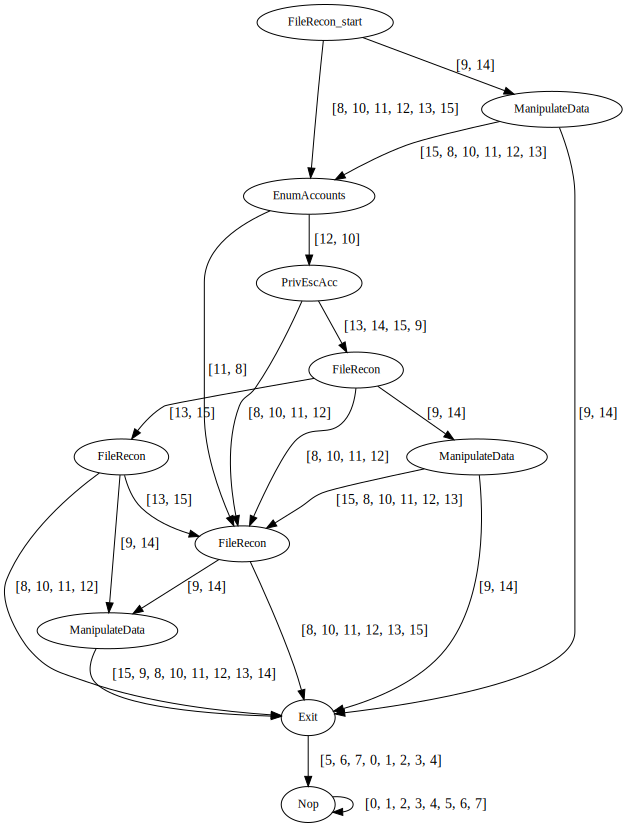

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1166106620_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success

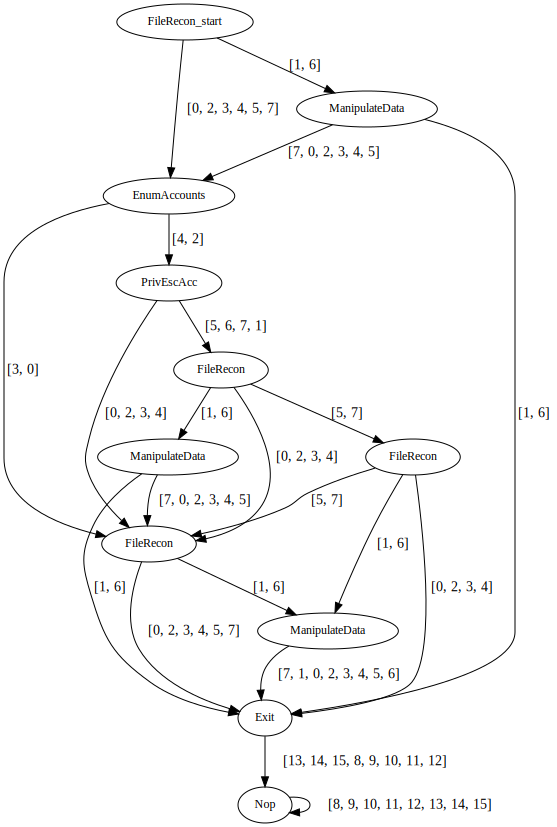

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/247162961_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


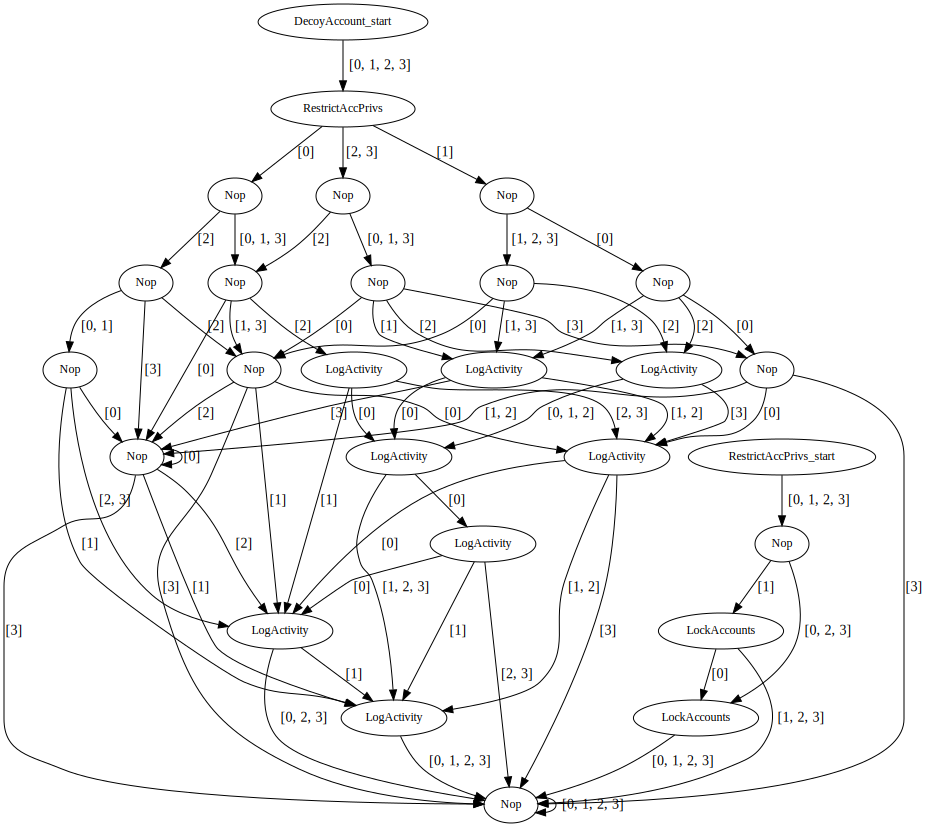

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1890266440_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


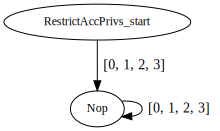

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1863655430_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
2:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
5:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
6:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, termin

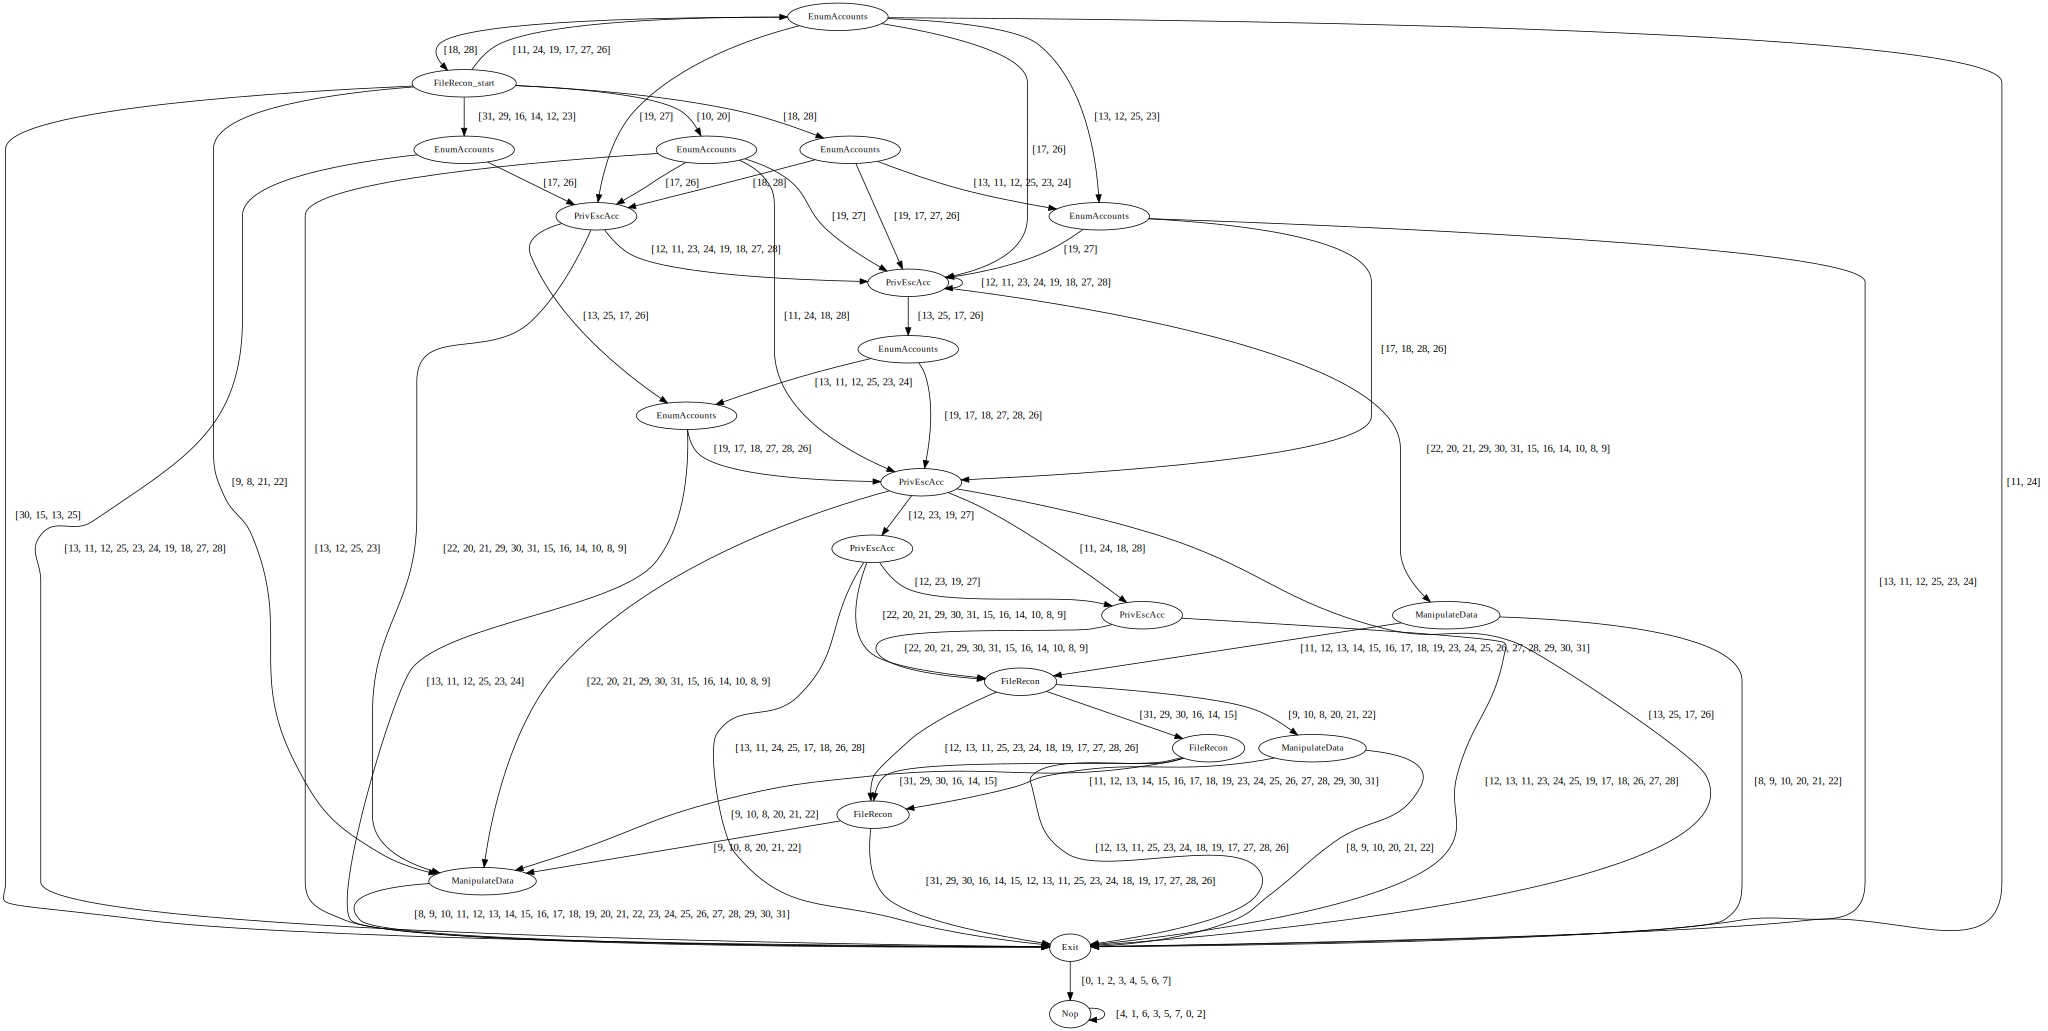

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1446001495_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
5:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
7:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, termin

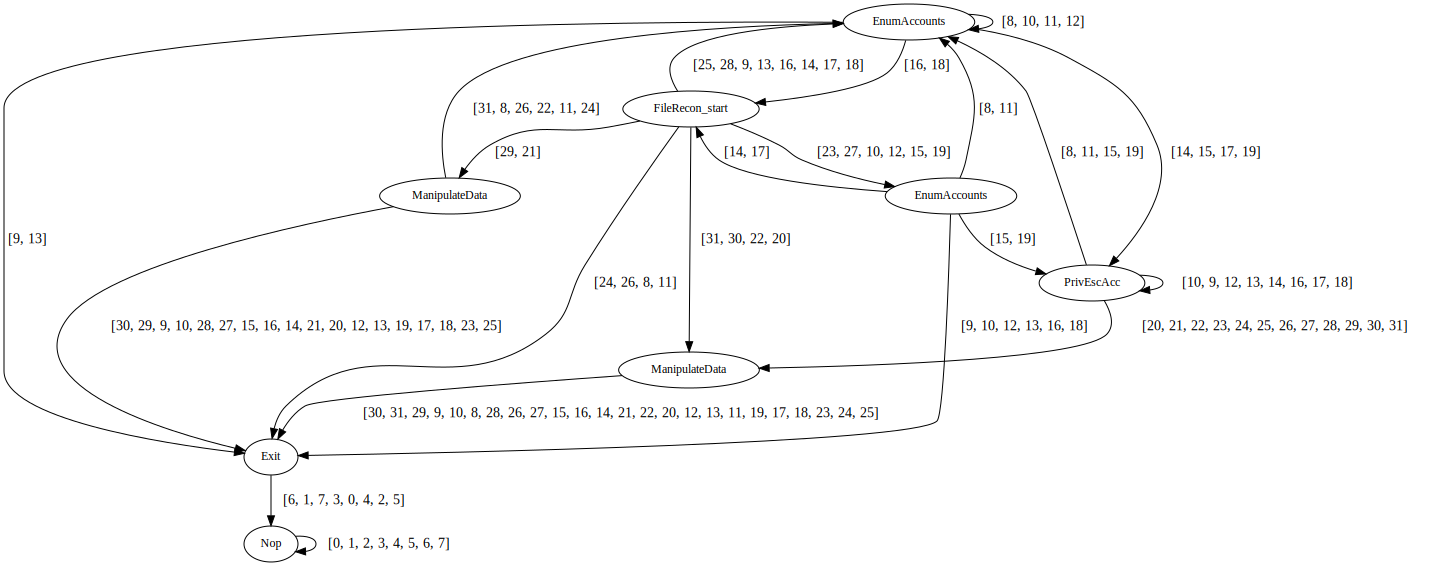

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                    5.000000e-01   
1                         0.980392                    1.960785e-02   
2                         0.999999                    6.864807e-07   
3                         0.999999                    6.864807e-07   
4                         0.999999                    6.864807e-07   
5                         0.999999                    6.864807e-07   
6                         0.999999                    6.864807e-07   
7                         0.999999                    6.864807e-07   
8                         0.999999                    6.864807e-07   
9                         0.999999                    6.864807e-07   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                         none   
8                            auth                         none   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

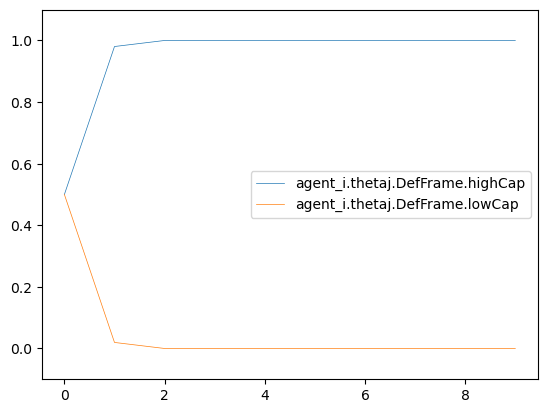

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                   login_activity
2                               1.0                       file_write
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                        file_enum

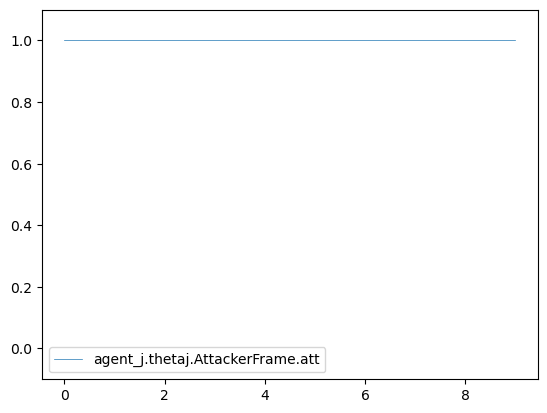

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0       FileRecon      DecoyAccount
1                 0.0                  1.0  ManipulateData  RestrictAccPrivs
2                 0.0                  1.0            Exit               Nop
3                 1.0                  0.0             Nop               Nop
4                 1.0                  0.0             Nop       LogActivity
5                 1.0                  0.0             Nop               Nop
6                 1.0                  0.0             Nop               Nop
7                 1.0                  0.0             Nop               Nop
8                 1.0                  0.0             Nop               Nop
9                 1.0                  0.0             Nop               Nop

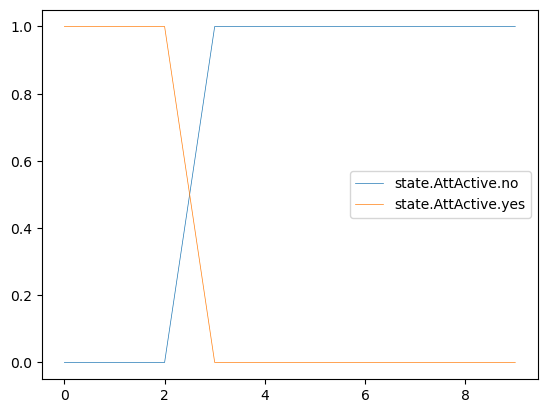

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   1.0                    0.0             Nop   
4                   1.0                    0.0             Nop   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

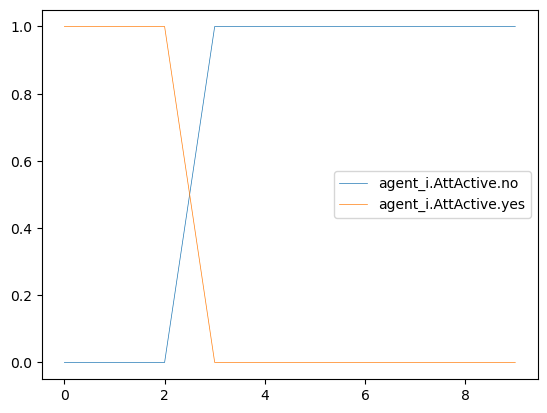

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000               Nop   
3              0.000005               0.999995               Nop   
4              0.066746               0.933254       LogActivity   
5              0.727227               0.272773               Nop   
6              0.963485               0.036515               Nop   
7              0.999459               0.000541               Nop   
8              0.999657               0.000343               Nop   
9              1.000000               0.000000               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                       file_write  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                        file_enum

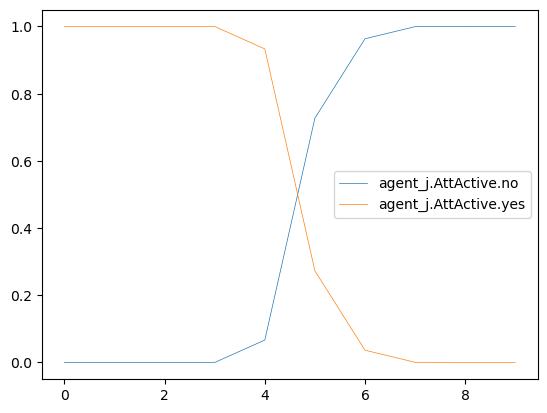

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   1.0                    0.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

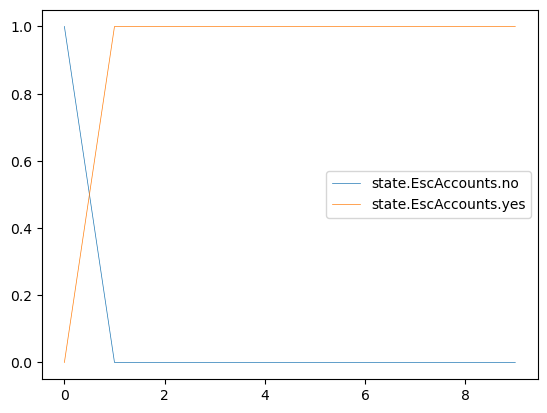

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0            5.000000e-01                 0.500000       FileRecon   
1            1.470588e-02                 0.985294  ManipulateData   
2            5.148605e-07                 1.000000            Exit   
3            5.148605e-07                 1.000000             Nop   
4            5.148606e-07                 1.000000             Nop   
5            5.148606e-07                 1.000000             Nop   
6            5.148605e-07                 0.999999             Nop   
7            5.148605e-07                 1.000000             Nop   
8            5.148605e-07                 0.999999             Nop   
9            5.148605e-07                 0.999999             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

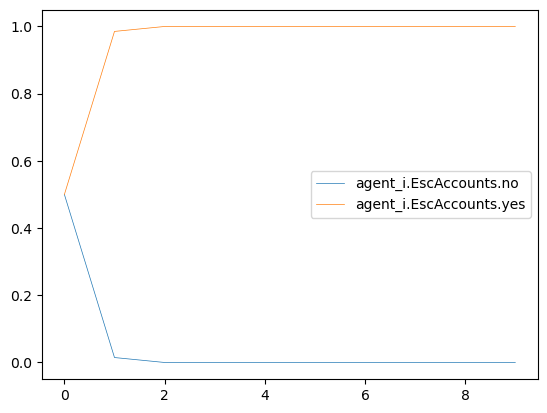

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0       LogActivity   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                       file_write  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                        file_enum

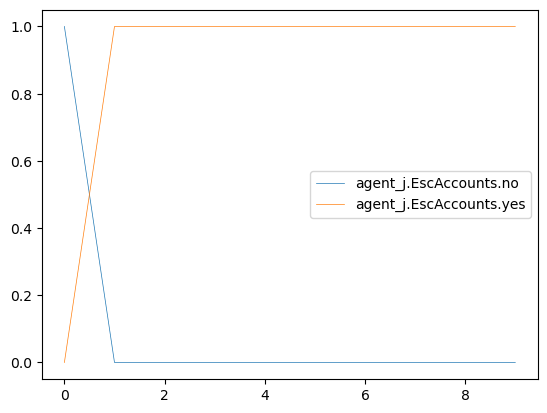

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0  ManipulateData   
2                    0.0                     1.0            Exit   
3                    0.0                     1.0             Nop   
4                    0.0                     1.0             Nop   
5                    0.0                     1.0             Nop   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

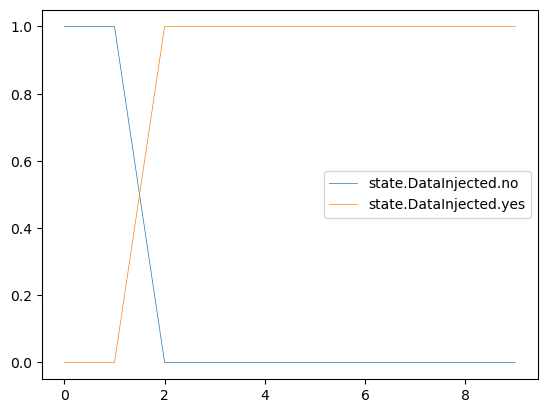

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.000112                  0.999888            Exit   
3                 0.000112                  0.999888             Nop   
4                 0.000112                  0.999888             Nop   
5                 0.000112                  0.999888             Nop   
6                 0.000112                  0.999888             Nop   
7                 0.000112                  0.999888             Nop   
8                 0.000112                  0.999888             Nop   
9                 0.000112                  0.999888             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

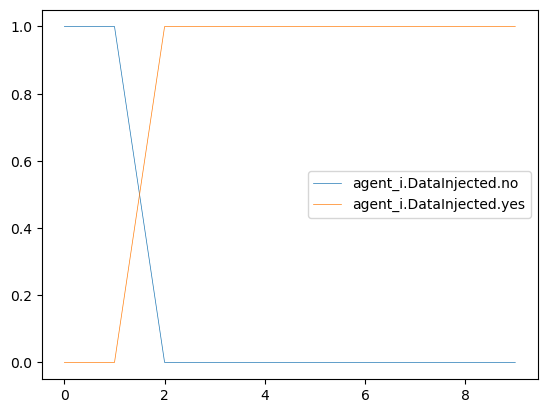

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.280000                  0.720000               Nop   
3                 0.280000                  0.720000               Nop   
4                 0.290515                  0.709485       LogActivity   
5                 0.260076                  0.739924               Nop   
6                 0.296564                  0.703436               Nop   
7                 0.297144                  0.702856               Nop   
8                 0.297055                  0.702945               Nop   
9                 0.297055                  0.702945               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                       file_write  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                        file_enum

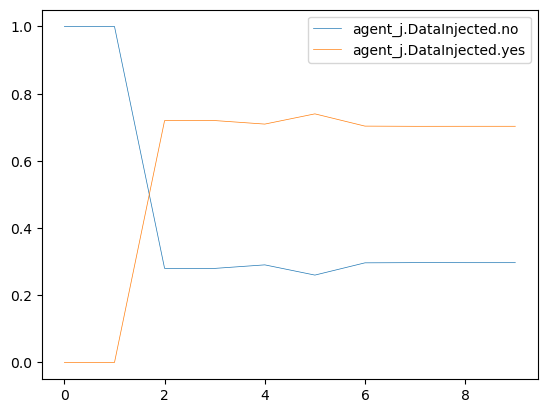

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

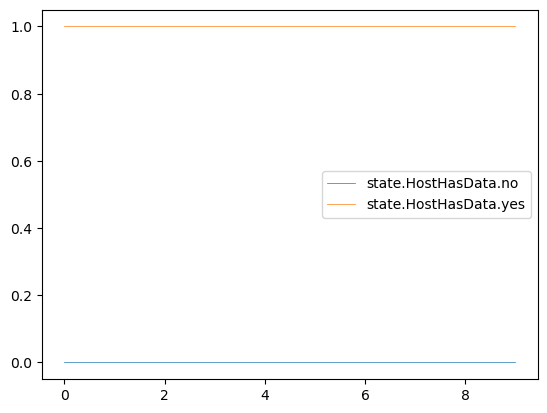

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.128676                 0.871324  ManipulateData   
2                0.000070                 0.999930            Exit   
3                0.000070                 0.999930             Nop   
4                0.000070                 0.999930             Nop   
5                0.000070                 0.999930             Nop   
6                0.000070                 0.999930             Nop   
7                0.000070                 0.999930             Nop   
8                0.000070                 0.999930             Nop   
9                0.000070                 0.999930             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

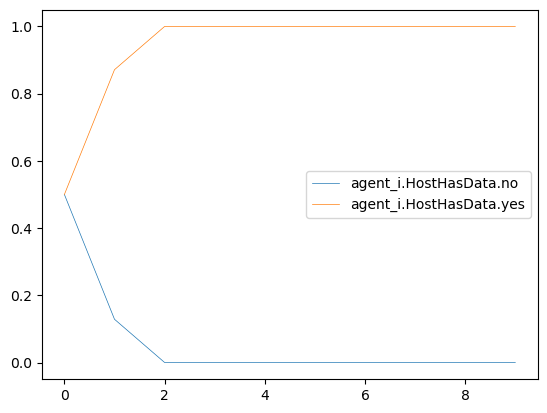

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0       LogActivity   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                       file_write  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                        file_enum

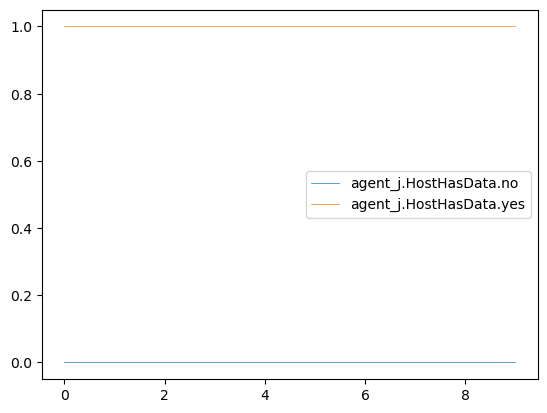

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0       FileRecon   
1                   0.0                   1.0  ManipulateData   
2                   1.0                   0.0            Exit   
3                   1.0                   0.0             Nop   
4                   1.0                   0.0             Nop   
5                   1.0                   0.0             Nop   
6                   1.0                   0.0             Nop   
7                   1.0                   0.0             Nop   
8                   1.0                   0.0             Nop   
9                   1.0                   0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

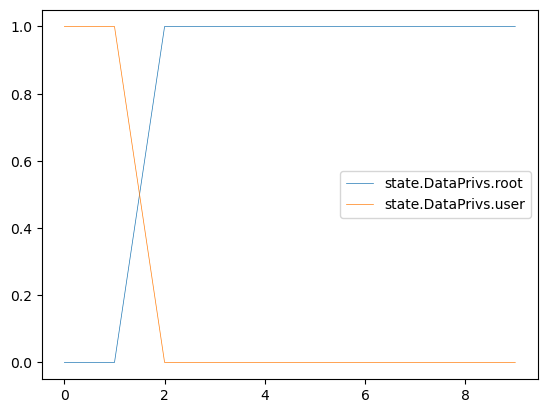

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.139706                0.860294  ManipulateData   
2                1.000000                0.000000            Exit   
3                1.000000                0.000000             Nop   
4                1.000000                0.000000             Nop   
5                1.000000                0.000000             Nop   
6                1.000000                0.000000             Nop   
7                1.000000                0.000000             Nop   
8                1.000000                0.000000             Nop   
9                1.000000                0.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

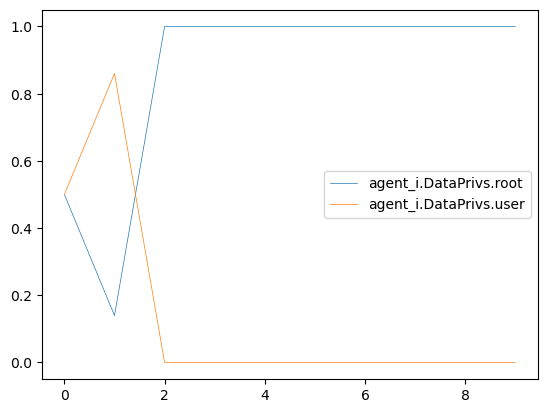

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0       LogActivity   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                       file_write  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                        file_enum

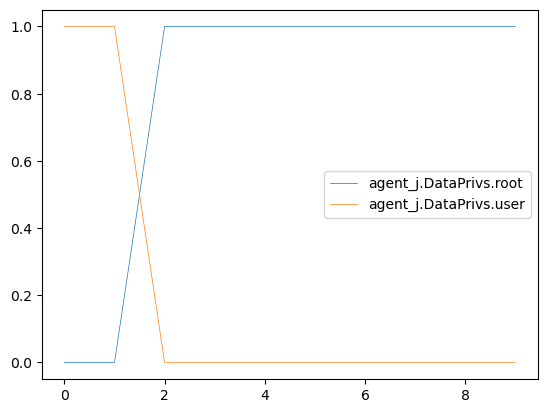

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0  ManipulateData   
2                     0.0                     1.0            Exit   
3                     0.0                     1.0             Nop   
4                     0.0                     1.0             Nop   
5                     0.0                     1.0             Nop   
6                     0.0                     1.0             Nop   
7                     0.0                     1.0             Nop   
8                     0.0                     1.0             Nop   
9                     0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

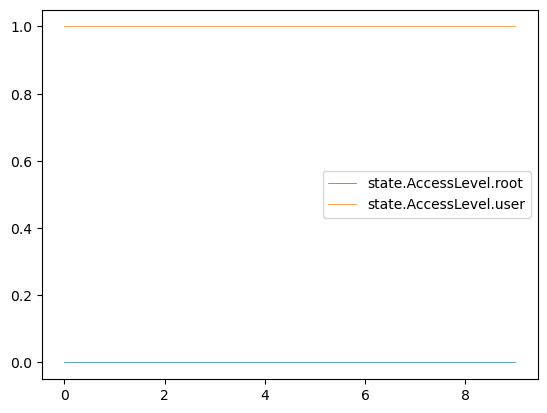

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0            Exit   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

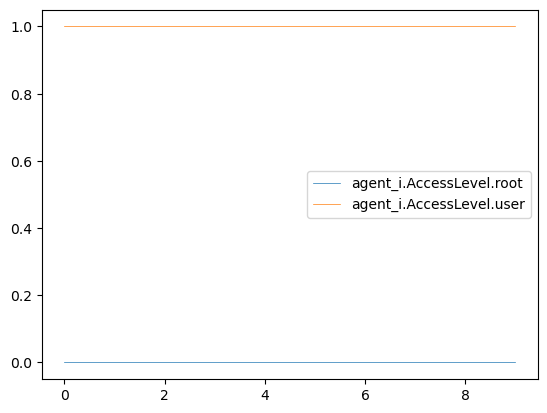

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.194400                  0.805600               Nop   
4                  0.709482                  0.290518       LogActivity   
5                  0.267235                  0.732765               Nop   
6                  0.106699                  0.893301               Nop   
7                  0.103799                  0.896201               Nop   
8                  0.104062                  0.895938               Nop   
9                  0.104062                  0.895938               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                       file_write  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                        file_enum

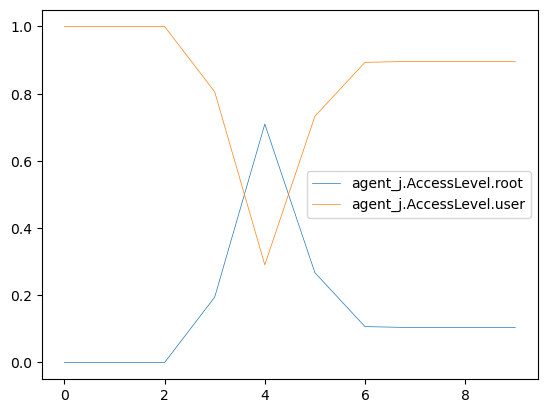

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0       FileRecon      DecoyAccount
1                1.0                 0.0  ManipulateData  RestrictAccPrivs
2                1.0                 0.0            Exit               Nop
3                1.0                 0.0             Nop               Nop
4                1.0                 0.0             Nop       LogActivity
5                1.0                 0.0             Nop               Nop
6                1.0                 0.0             Nop               Nop
7                1.0                 0.0             Nop               Nop
8                1.0                 0.0             Nop               Nop
9                1.0                 0.0             Nop               Nop

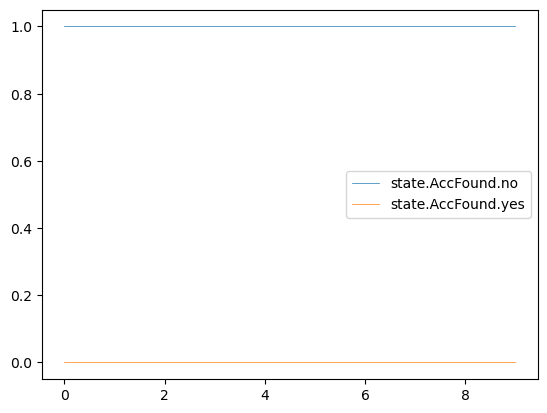

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0                  1.0                   0.0       FileRecon   
1                  1.0                   0.0  ManipulateData   
2                  1.0                   0.0            Exit   
3                  1.0                   0.0             Nop   
4                  1.0                   0.0             Nop   
5                  1.0                   0.0             Nop   
6                  1.0                   0.0             Nop   
7                  1.0                   0.0             Nop   
8                  1.0                   0.0             Nop   
9                  1.0                   0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

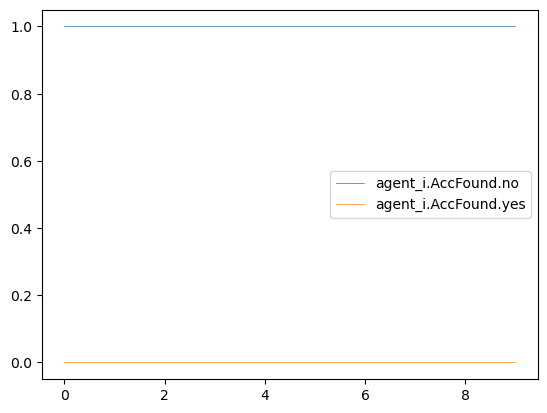

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.784000              0.216000               Nop   
3             0.200004              0.799996               Nop   
4             0.207193              0.792807       LogActivity   
5             0.513157              0.486843               Nop   
6             0.625580              0.374420               Nop   
7             0.627610              0.372390               Nop   
8             0.627426              0.372574               Nop   
9             0.627426              0.372574               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                       file_write  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                        file_enum

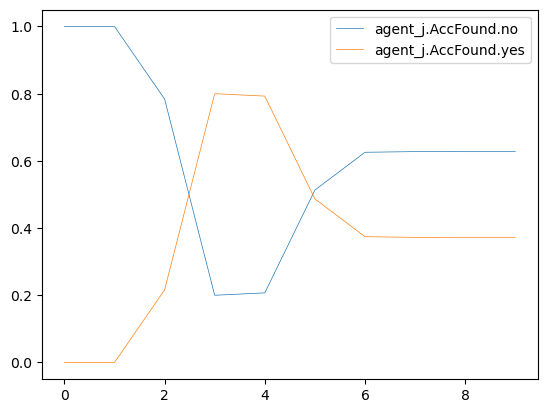

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0       FileRecon      DecoyAccount
1                 0.0                  1.0  ManipulateData  RestrictAccPrivs
2                 0.0                  1.0            Exit               Nop
3                 0.0                  1.0             Nop               Nop
4                 0.0                  1.0             Nop       LogActivity
5                 0.0                  1.0             Nop               Nop
6                 0.0                  1.0             Nop               Nop
7                 0.0                  1.0             Nop               Nop
8                 0.0                  1.0             Nop               Nop
9                 0.0                  1.0             Nop               Nop

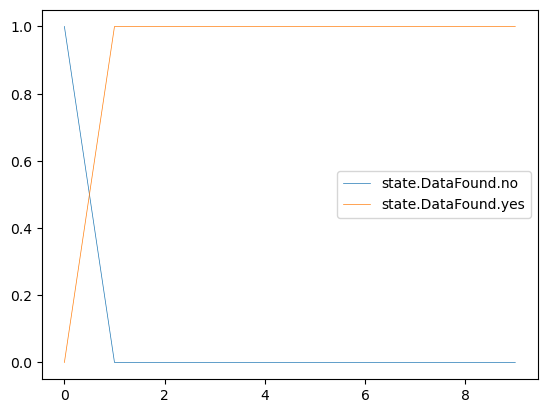

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000       FileRecon   
1              0.205882               0.794118  ManipulateData   
2              0.000112               0.999888            Exit   
3              0.000112               0.999888             Nop   
4              0.000112               0.999888             Nop   
5              0.000112               0.999888             Nop   
6              0.000112               0.999888             Nop   
7              0.000112               0.999888             Nop   
8              0.000112               0.999888             Nop   
9              0.000112               0.999888             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

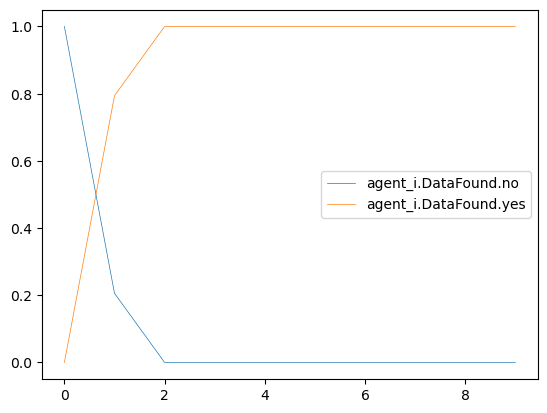

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.200000               0.800000               Nop   
3              0.200000               0.800000               Nop   
4              0.103841               0.896159       LogActivity   
5              0.185823               0.814177               Nop   
6              0.224713               0.775287               Nop   
7              0.225432               0.774568               Nop   
8              0.225366               0.774634               Nop   
9              0.225366               0.774634               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                       file_write  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                        file_enum

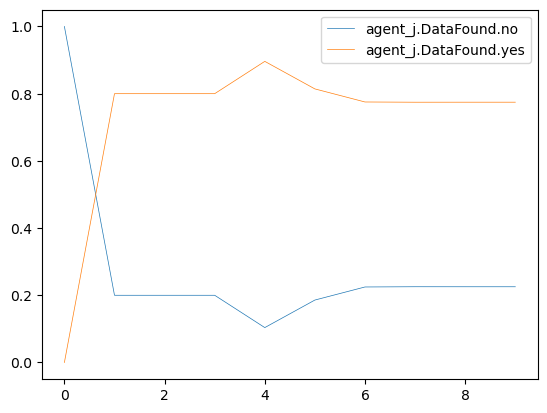

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0       FileRecon      DecoyAccount  
1                      1.0  ManipulateData  RestrictAccPrivs  
2                      1.0            Exit               Nop  
3                      1.0             Nop               Nop  
4                      1.0             Nop       LogActivity  
5                      1.0             Nop               Nop  
6                      1.0             Nop               Nop  
7                      1.0             Nop               Nop  
8                      1.0             Nop               Nop  
9                      1.0             Nop               Nop

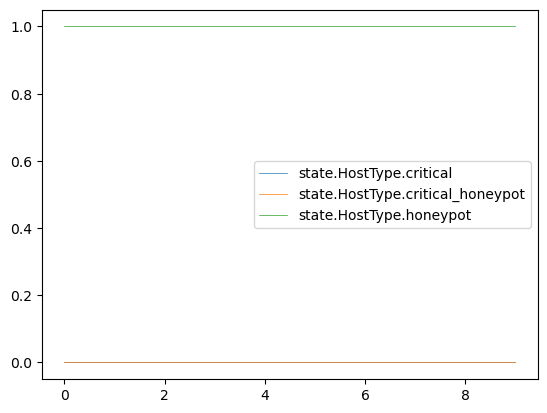

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0       FileRecon      DecoyAccount   
1                        0.0  ManipulateData  RestrictAccPrivs   
2                        0.0            Exit               Nop   
3                        0.0             Nop               Nop   
4                        0.0             Nop       LogActivity   
5                        0.0             Nop               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                         none   
8                            auth                         none   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

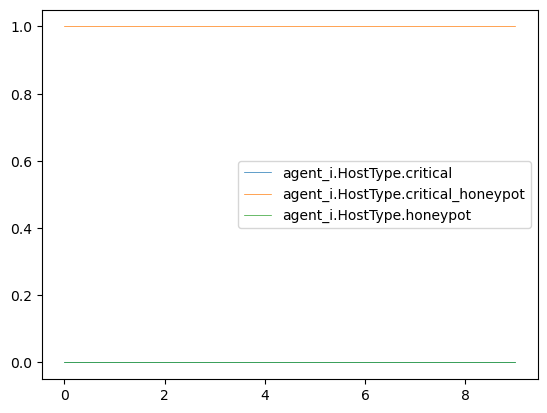

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount       FileRecon   
1                        1.0  RestrictAccPrivs  ManipulateData   
2                        1.0               Nop            Exit   
3                        1.0               Nop             Nop   
4                        1.0       LogActivity             Nop   
5                        1.0               Nop             Nop   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                       file_write  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                       file_write  
8                             none  
9                        file_enum

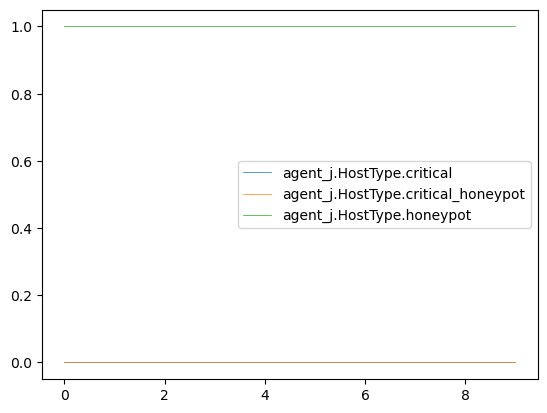

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                    5.000000e-01   
1                         0.980392                    1.960785e-02   
2                         0.999999                    6.864807e-07   
3                         0.999999                    6.864807e-07   
4                         0.999999                    6.864807e-07   
5                         0.999999                    6.864807e-07   
6                         0.999999                    6.864807e-07   
7                         0.999999                    6.864807e-07   
8                         0.999999                    6.864807e-07   
9                         0.999999                    6.864807e-07   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                         none   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

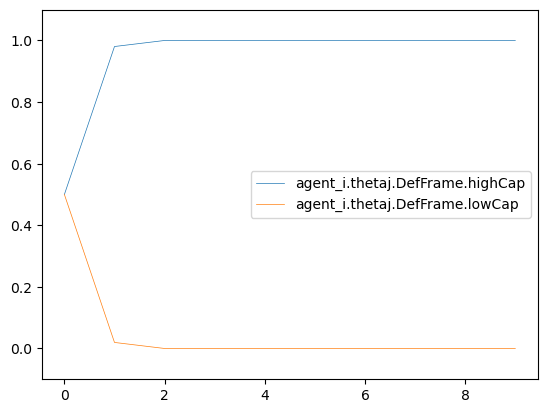

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                             none
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                             none
7                               1.0                   login_activity
8                               1.0                        file_enum
9                               1.0                             none

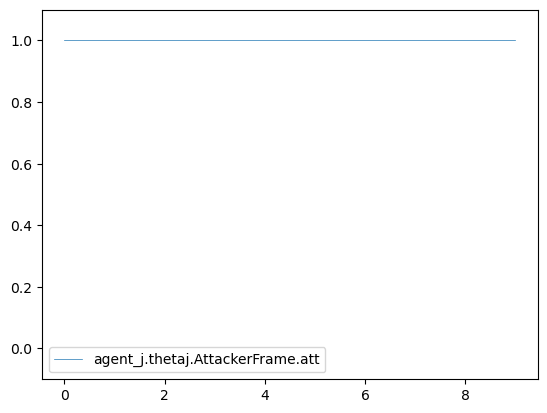

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0       FileRecon      DecoyAccount
1                 0.0                  1.0  ManipulateData  RestrictAccPrivs
2                 0.0                  1.0            Exit               Nop
3                 1.0                  0.0             Nop               Nop
4                 1.0                  0.0             Nop       LogActivity
5                 1.0                  0.0             Nop       LogActivity
6                 1.0                  0.0             Nop       LogActivity
7                 1.0                  0.0             Nop               Nop
8                 1.0                  0.0             Nop               Nop
9                 1.0                  0.0             Nop               Nop

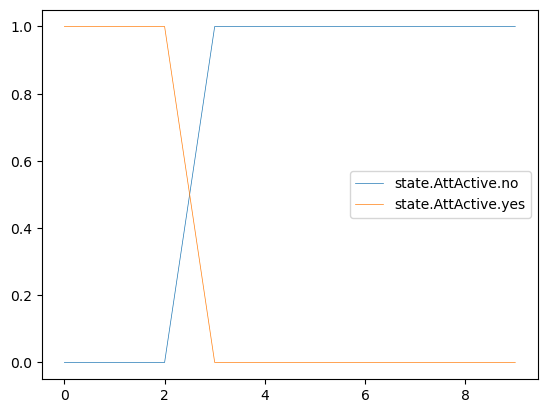

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   1.0                    0.0             Nop   
4                   1.0                    0.0             Nop   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4       LogActivity                            auth   
5       LogActivity                          denied   
6       LogActivity                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

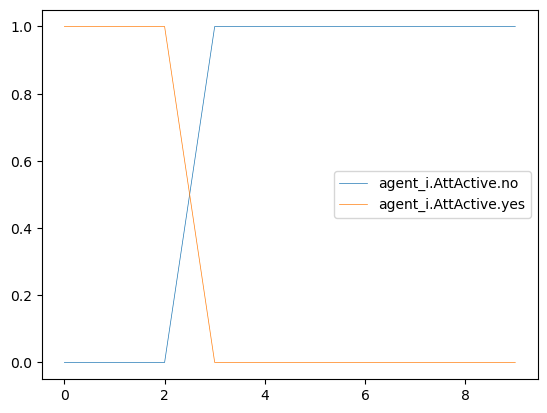

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000               Nop   
3              0.000046               0.999954               Nop   
4              0.082208               0.917792       LogActivity   
5              0.063036               0.936964       LogActivity   
6              0.060652               0.939348       LogActivity   
7              0.908024               0.091976               Nop   
8              0.991710               0.008290               Nop   
9              1.000000               0.000000               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                        file_enum  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                        file_enum  
9             Nop                             none

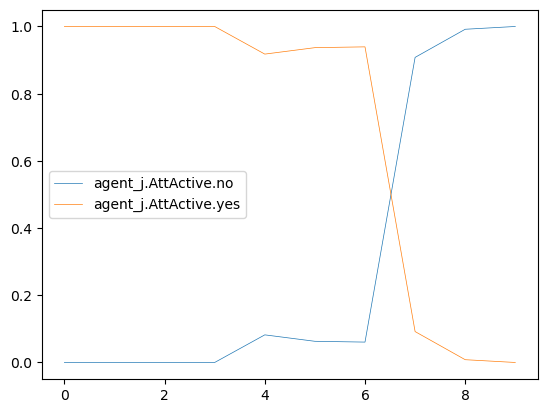

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   1.0                    0.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5       LogActivity  
6       LogActivity  
7               Nop  
8               Nop  
9               Nop

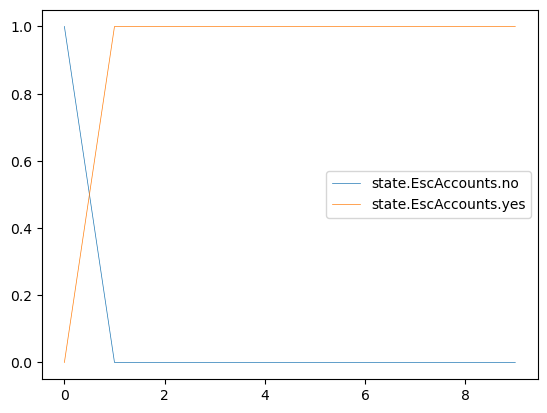

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0            5.000000e-01                 0.500000       FileRecon   
1            1.470588e-02                 0.985294  ManipulateData   
2            5.148605e-07                 1.000000            Exit   
3            5.148605e-07                 1.000000             Nop   
4            5.148606e-07                 1.000000             Nop   
5            5.148606e-07                 1.000000             Nop   
6            5.148605e-07                 0.999999             Nop   
7            5.148605e-07                 1.000000             Nop   
8            5.148605e-07                 0.999999             Nop   
9            5.148605e-07                 0.999999             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4       LogActivity                            auth   
5       LogActivity                          denied   
6       LogActivity                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

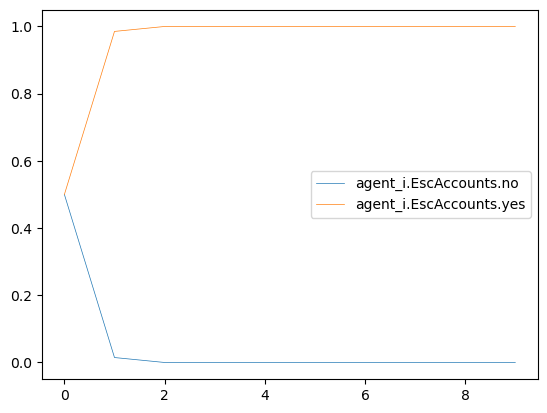

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0       LogActivity   
5                     0.0                      1.0       LogActivity   
6                     0.0                      1.0       LogActivity   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                        file_enum  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                        file_enum  
9             Nop                             none

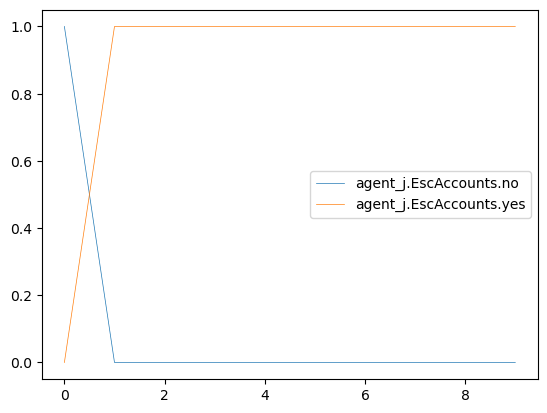

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0  ManipulateData   
2                    0.0                     1.0            Exit   
3                    0.0                     1.0             Nop   
4                    0.0                     1.0             Nop   
5                    0.0                     1.0             Nop   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5       LogActivity  
6       LogActivity  
7               Nop  
8               Nop  
9               Nop

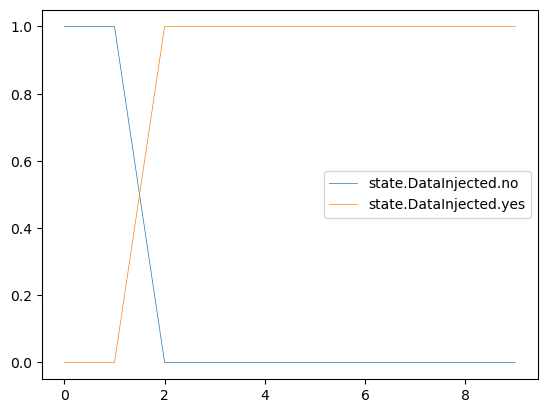

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.000112                  0.999888            Exit   
3                 0.000112                  0.999888             Nop   
4                 0.000112                  0.999888             Nop   
5                 0.000112                  0.999888             Nop   
6                 0.000112                  0.999888             Nop   
7                 0.000112                  0.999888             Nop   
8                 0.000112                  0.999888             Nop   
9                 0.000112                  0.999888             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4       LogActivity                            auth   
5       LogActivity                          denied   
6       LogActivity                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

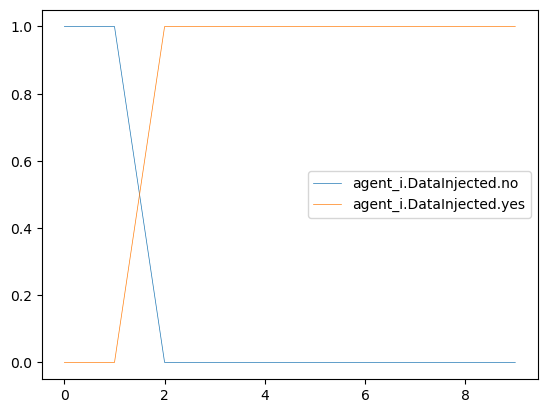

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.063197                  0.936803               Nop   
3                 0.063234                  0.936766               Nop   
4                 0.129242                  0.870758       LogActivity   
5                 0.040531                  0.959469       LogActivity   
6                 0.031579                  0.968421       LogActivity   
7                 0.023483                  0.976518               Nop   
8                 0.023231                  0.976769               Nop   
9                 0.023231                  0.976769               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                        file_enum  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                        file_enum  
9             Nop                             none

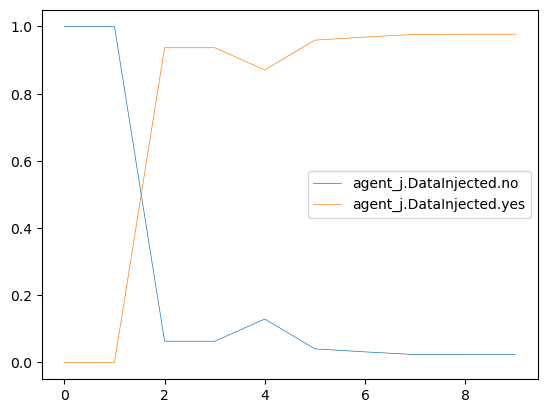

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5       LogActivity  
6       LogActivity  
7               Nop  
8               Nop  
9               Nop

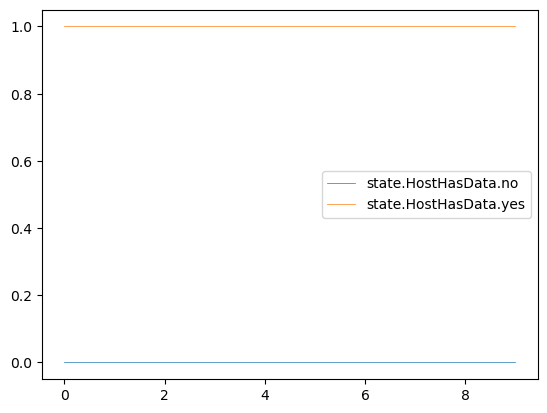

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.128676                 0.871324  ManipulateData   
2                0.000070                 0.999930            Exit   
3                0.000070                 0.999930             Nop   
4                0.000070                 0.999930             Nop   
5                0.000070                 0.999930             Nop   
6                0.000070                 0.999930             Nop   
7                0.000070                 0.999930             Nop   
8                0.000070                 0.999930             Nop   
9                0.000070                 0.999930             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4       LogActivity                            auth   
5       LogActivity                          denied   
6       LogActivity                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

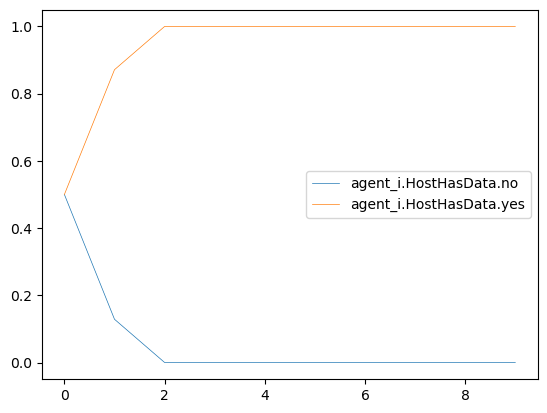

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0       LogActivity   
5                     0.0                      1.0       LogActivity   
6                     0.0                      1.0       LogActivity   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                        file_enum  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                        file_enum  
9             Nop                             none

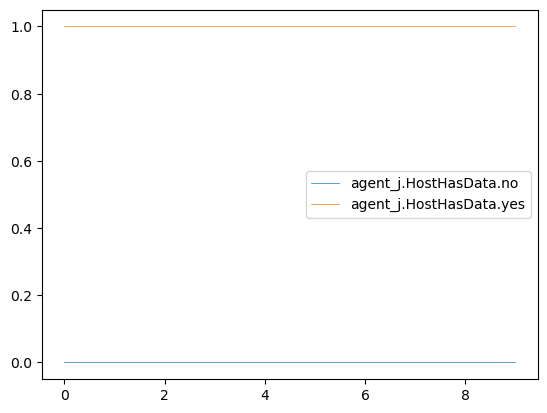

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0       FileRecon   
1                   0.0                   1.0  ManipulateData   
2                   1.0                   0.0            Exit   
3                   1.0                   0.0             Nop   
4                   1.0                   0.0             Nop   
5                   1.0                   0.0             Nop   
6                   1.0                   0.0             Nop   
7                   1.0                   0.0             Nop   
8                   1.0                   0.0             Nop   
9                   1.0                   0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5       LogActivity  
6       LogActivity  
7               Nop  
8               Nop  
9               Nop

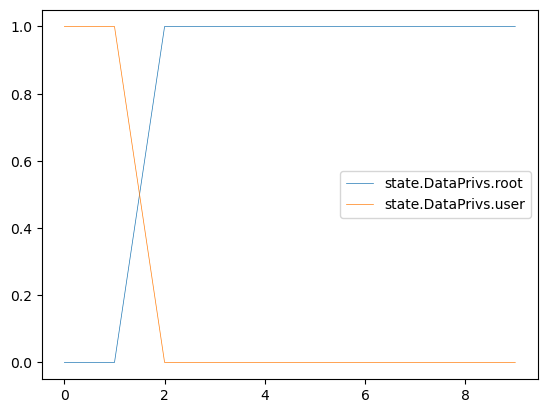

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.139706                0.860294  ManipulateData   
2                1.000000                0.000000            Exit   
3                1.000000                0.000000             Nop   
4                1.000000                0.000000             Nop   
5                1.000000                0.000000             Nop   
6                1.000000                0.000000             Nop   
7                1.000000                0.000000             Nop   
8                1.000000                0.000000             Nop   
9                1.000000                0.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4       LogActivity                            auth   
5       LogActivity                          denied   
6       LogActivity                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

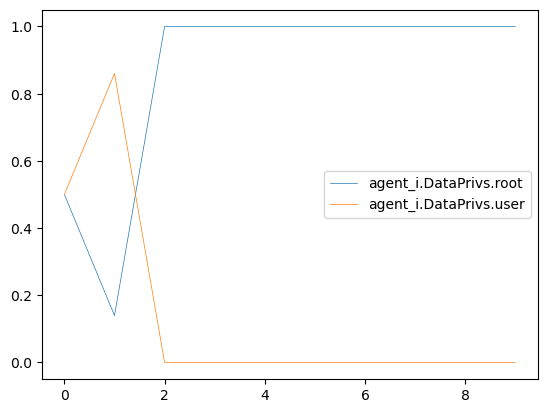

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0       LogActivity   
5                     1.0                     0.0       LogActivity   
6                     1.0                     0.0       LogActivity   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                        file_enum  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                        file_enum  
9             Nop                             none

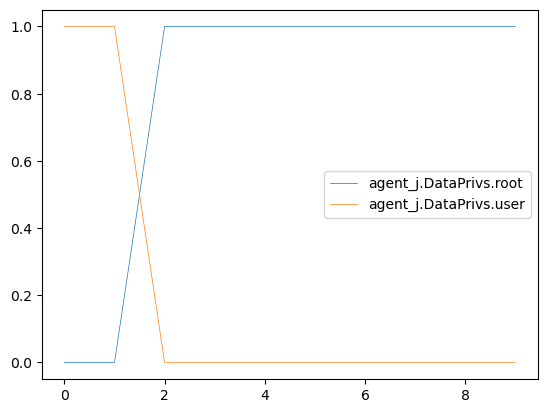

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0  ManipulateData   
2                     0.0                     1.0            Exit   
3                     0.0                     1.0             Nop   
4                     0.0                     1.0             Nop   
5                     0.0                     1.0             Nop   
6                     0.0                     1.0             Nop   
7                     0.0                     1.0             Nop   
8                     0.0                     1.0             Nop   
9                     0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5       LogActivity  
6       LogActivity  
7               Nop  
8               Nop  
9               Nop

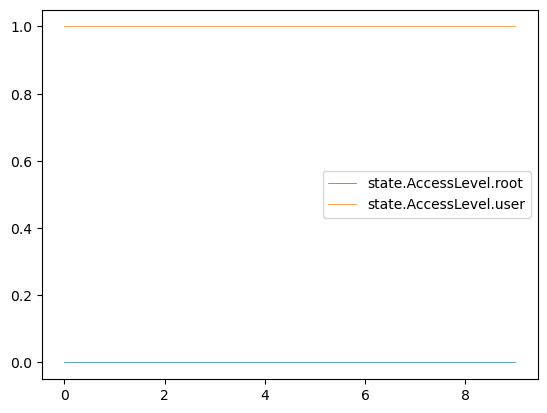

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0            Exit   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4       LogActivity                            auth   
5       LogActivity                          denied   
6       LogActivity                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

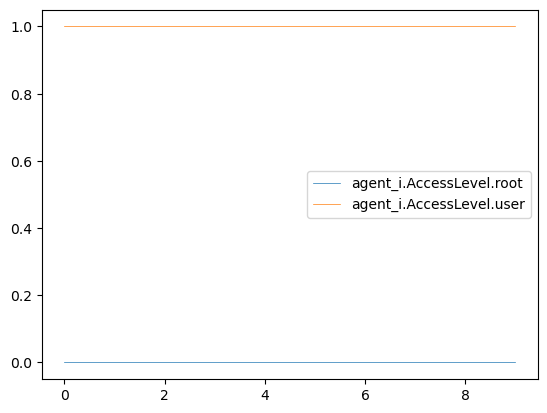

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.036132                  0.963868               Nop   
4                  0.669235                  0.330765       LogActivity   
5                  0.912027                  0.087973       LogActivity   
6                  0.943467                  0.056533       LogActivity   
7                  0.912269                  0.087731               Nop   
8                  0.912269                  0.087731               Nop   
9                  0.912269                  0.087731               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                        file_enum  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                        file_enum  
9             Nop                             none

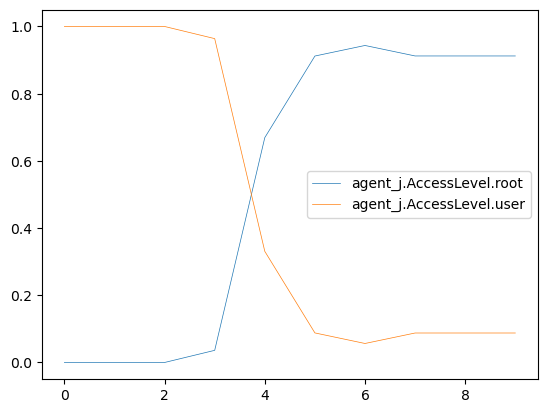

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0       FileRecon      DecoyAccount
1                1.0                 0.0  ManipulateData  RestrictAccPrivs
2                1.0                 0.0            Exit               Nop
3                1.0                 0.0             Nop               Nop
4                1.0                 0.0             Nop       LogActivity
5                1.0                 0.0             Nop       LogActivity
6                1.0                 0.0             Nop       LogActivity
7                1.0                 0.0             Nop               Nop
8                1.0                 0.0             Nop               Nop
9                1.0                 0.0             Nop               Nop

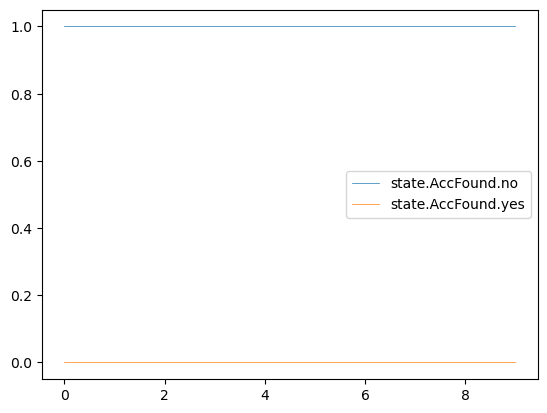

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0                  1.0                   0.0       FileRecon   
1                  1.0                   0.0  ManipulateData   
2                  1.0                   0.0            Exit   
3                  1.0                   0.0             Nop   
4                  1.0                   0.0             Nop   
5                  1.0                   0.0             Nop   
6                  1.0                   0.0             Nop   
7                  1.0                   0.0             Nop   
8                  1.0                   0.0             Nop   
9                  1.0                   0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4       LogActivity                            auth   
5       LogActivity                          denied   
6       LogActivity                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

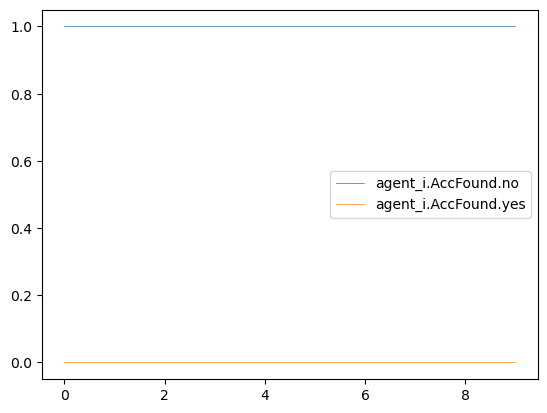

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.959851              0.040149               Nop   
3             0.200036              0.799964               Nop   
4             0.234802              0.765198       LogActivity   
5             0.068642              0.931358       LogActivity   
6             0.044110              0.955890       LogActivity   
7             0.068453              0.931548               Nop   
8             0.068453              0.931548               Nop   
9             0.068453              0.931547               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                        file_enum  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                        file_enum  
9             Nop                             none

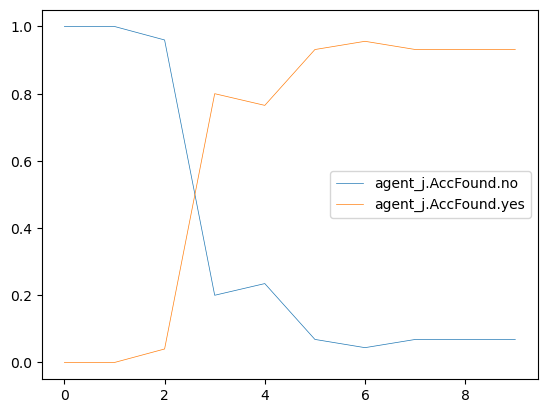

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0       FileRecon      DecoyAccount
1                 0.0                  1.0  ManipulateData  RestrictAccPrivs
2                 0.0                  1.0            Exit               Nop
3                 0.0                  1.0             Nop               Nop
4                 0.0                  1.0             Nop       LogActivity
5                 0.0                  1.0             Nop       LogActivity
6                 0.0                  1.0             Nop       LogActivity
7                 0.0                  1.0             Nop               Nop
8                 0.0                  1.0             Nop               Nop
9                 0.0                  1.0             Nop               Nop

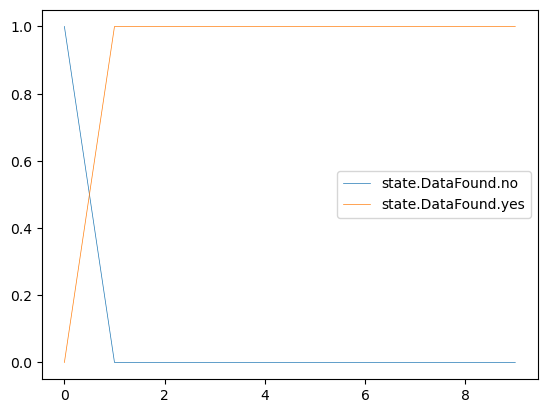

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000       FileRecon   
1              0.205882               0.794118  ManipulateData   
2              0.000112               0.999888            Exit   
3              0.000112               0.999888             Nop   
4              0.000112               0.999888             Nop   
5              0.000112               0.999888             Nop   
6              0.000112               0.999888             Nop   
7              0.000112               0.999888             Nop   
8              0.000112               0.999888             Nop   
9              0.000112               0.999888             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4       LogActivity                            auth   
5       LogActivity                          denied   
6       LogActivity                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

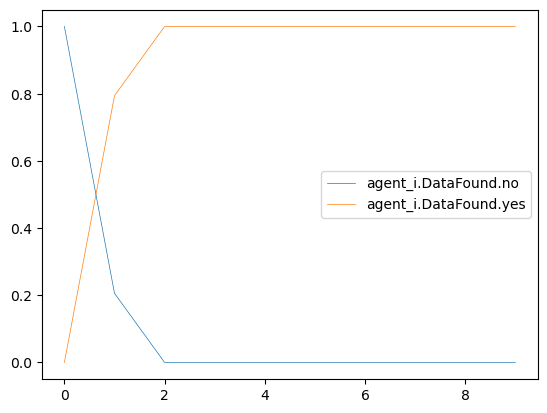

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.048327               0.951673               Nop   
3              0.048364               0.951636               Nop   
4              0.074951               0.925049       LogActivity   
5              0.016454               0.983546       LogActivity   
6              0.011255               0.988745       LogActivity   
7              0.016514               0.983486               Nop   
8              0.016514               0.983486               Nop   
9              0.016514               0.983486               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                        file_enum  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                        file_enum  
9             Nop                             none

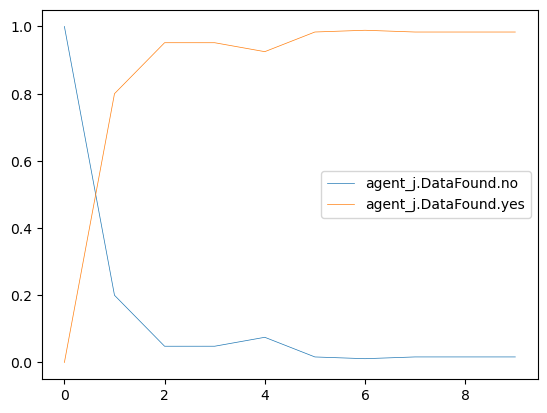

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0       FileRecon      DecoyAccount  
1                      1.0  ManipulateData  RestrictAccPrivs  
2                      1.0            Exit               Nop  
3                      1.0             Nop               Nop  
4                      1.0             Nop       LogActivity  
5                      1.0             Nop       LogActivity  
6                      1.0             Nop       LogActivity  
7                      1.0             Nop               Nop  
8                      1.0             Nop               Nop  
9                      1.0             Nop               Nop

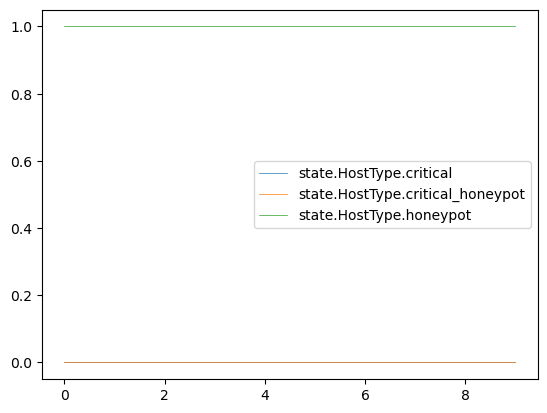

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0       FileRecon      DecoyAccount   
1                        0.0  ManipulateData  RestrictAccPrivs   
2                        0.0            Exit               Nop   
3                        0.0             Nop               Nop   
4                        0.0             Nop       LogActivity   
5                        0.0             Nop       LogActivity   
6                        0.0             Nop       LogActivity   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                         none   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

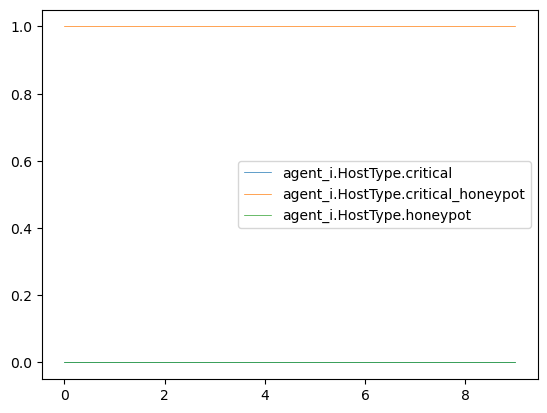

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount       FileRecon   
1                        1.0  RestrictAccPrivs  ManipulateData   
2                        1.0               Nop            Exit   
3                        1.0               Nop             Nop   
4                        1.0       LogActivity             Nop   
5                        1.0       LogActivity             Nop   
6                        1.0       LogActivity             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                        file_enum  
5                        file_enum  
6                             none  
7                   login_activity  
8                        file_enum  
9                             none

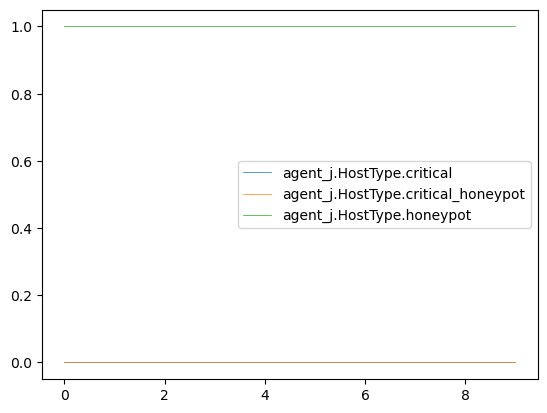

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.900262                        0.099738   
2                         0.900262                        0.099738   
3                         0.900263                        0.099738   
4                         0.900263                        0.099738   
5                         0.900263                        0.099738   
6                         0.900263                        0.099738   
7                         0.900262                        0.099738   
8                         0.900262                        0.099738   
9                         0.900262                        0.099738   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                            auth                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

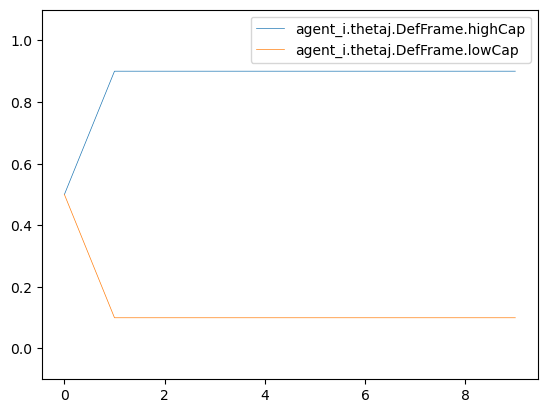

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

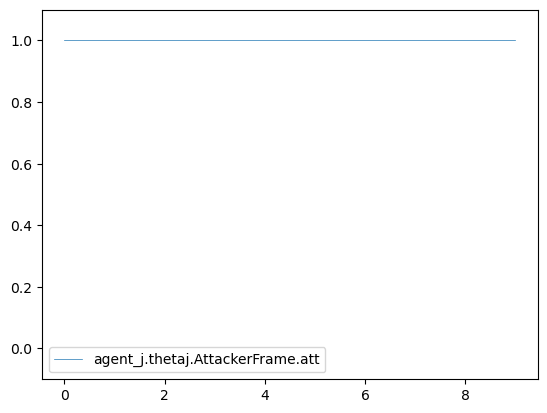

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action    agent_j.action
0                 0.0                  1.0      FileRecon      DecoyAccount
1                 0.0                  1.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop               Nop
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop       LogActivity
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

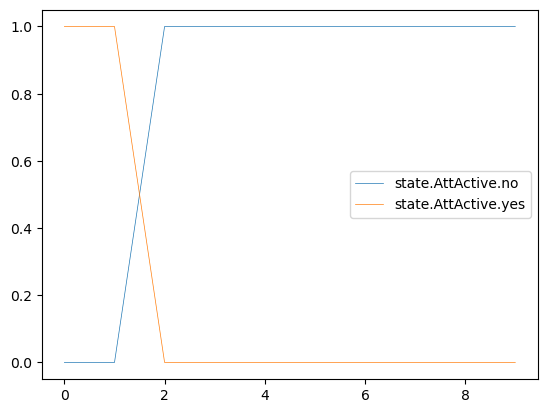

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  \
0                   0.0                    1.0      FileRecon   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

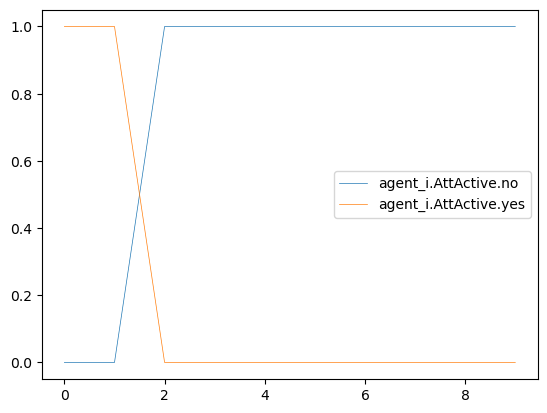

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000               Nop   
3              0.000046               0.999954               Nop   
4              0.082208               0.917792       LogActivity   
5              0.761223               0.238777               Nop   
6              0.960557               0.039443               Nop   
7              0.999418               0.000582               Nop   
8              0.999992               0.000008               Nop   
9              1.000000               0.000000               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

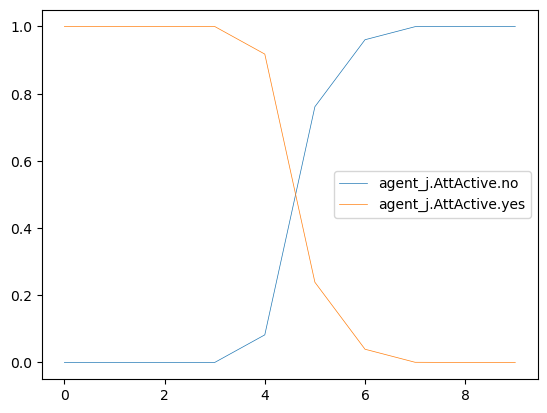

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  \
0                   1.0                    0.0      FileRecon   
1                   0.0                    1.0           Exit   
2                   0.0                    1.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

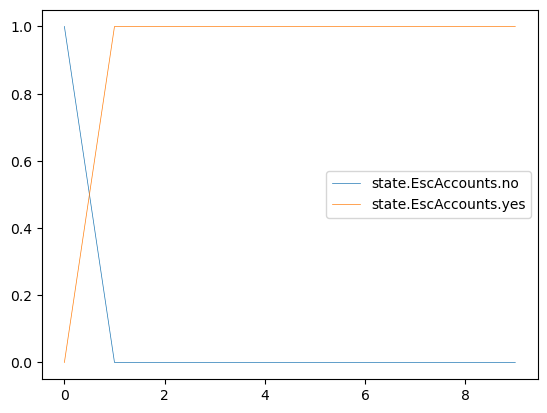

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.074803                 0.925197           Exit   
2                0.074803                 0.925197            Nop   
3                0.074803                 0.925197            Nop   
4                0.074803                 0.925197            Nop   
5                0.074803                 0.925197            Nop   
6                0.074803                 0.925197            Nop   
7                0.074803                 0.925197            Nop   
8                0.074803                 0.925197            Nop   
9                0.074803                 0.925197            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

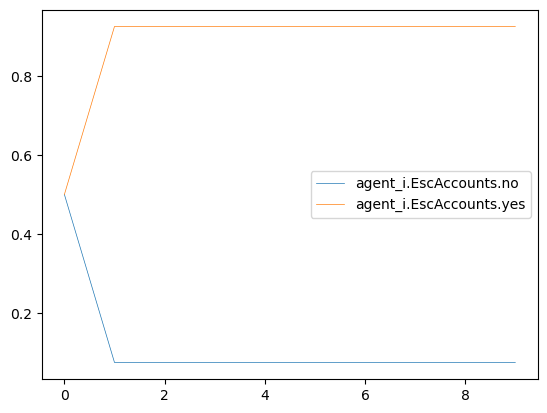

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0       LogActivity   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

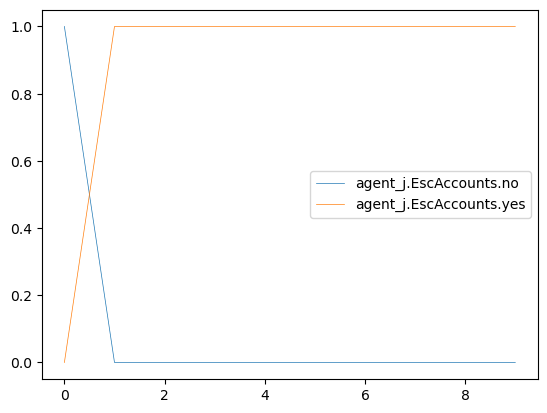

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0      FileRecon   
1                    1.0                     0.0           Exit   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

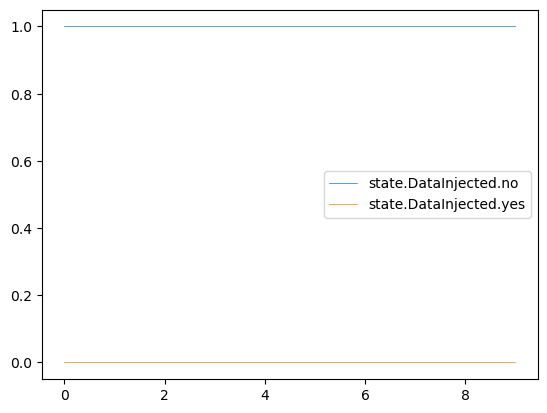

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

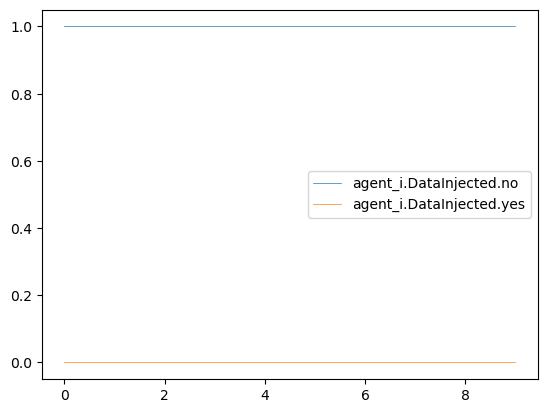

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.063197                  0.936803               Nop   
3                 0.063234                  0.936766               Nop   
4                 0.129242                  0.870758       LogActivity   
5                 0.216296                  0.783704               Nop   
6                 0.261040                  0.738960               Nop   
7                 0.261779                  0.738221               Nop   
8                 0.261790                  0.738210               Nop   
9                 0.261790                  0.738210               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

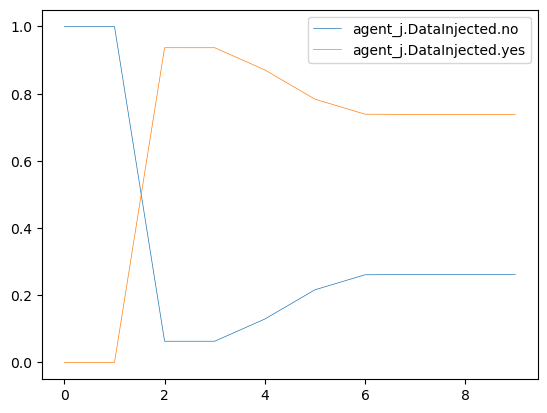

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  \
0                   0.0                    1.0      FileRecon   
1                   0.0                    1.0           Exit   
2                   0.0                    1.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

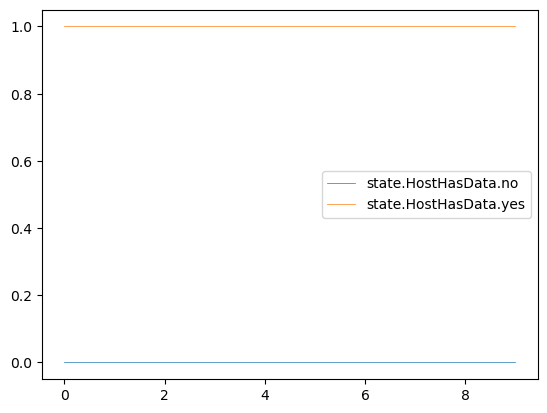

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.620079                 0.379921           Exit   
2                0.620079                 0.379921            Nop   
3                0.620079                 0.379921            Nop   
4                0.620079                 0.379921            Nop   
5                0.620079                 0.379921            Nop   
6                0.620079                 0.379921            Nop   
7                0.620079                 0.379921            Nop   
8                0.620079                 0.379921            Nop   
9                0.620079                 0.379921            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

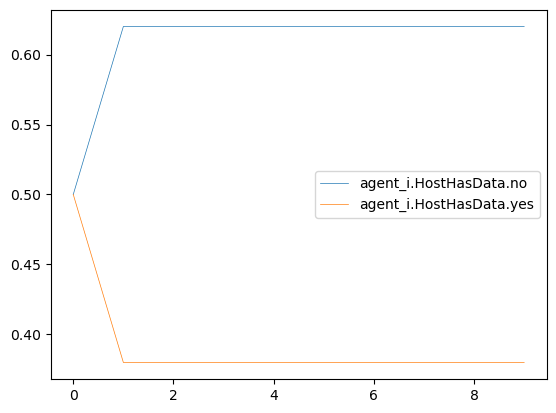

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0       LogActivity   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

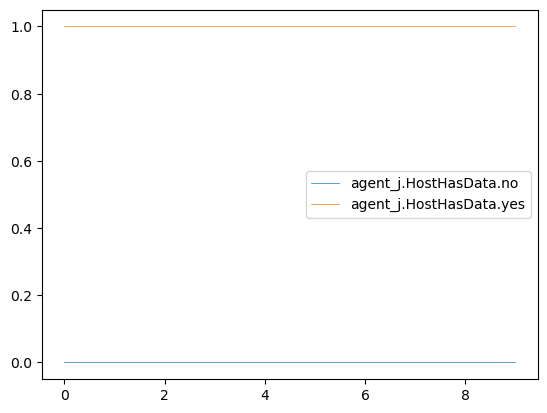

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action    agent_j.action
0                   0.0                   1.0      FileRecon      DecoyAccount
1                   0.0                   1.0           Exit  RestrictAccPrivs
2                   1.0                   0.0            Nop               Nop
3                   1.0                   0.0            Nop               Nop
4                   1.0                   0.0            Nop       LogActivity
5                   1.0                   0.0            Nop               Nop
6                   1.0                   0.0            Nop               Nop
7                   1.0                   0.0            Nop               Nop
8                   1.0                   0.0            Nop               Nop
9                   1.0                   0.0            Nop               Nop

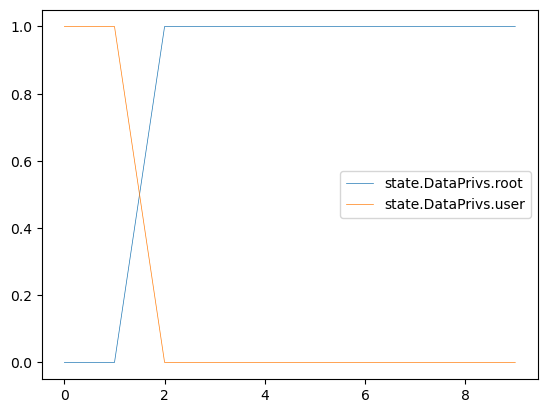

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.681102                0.318898           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

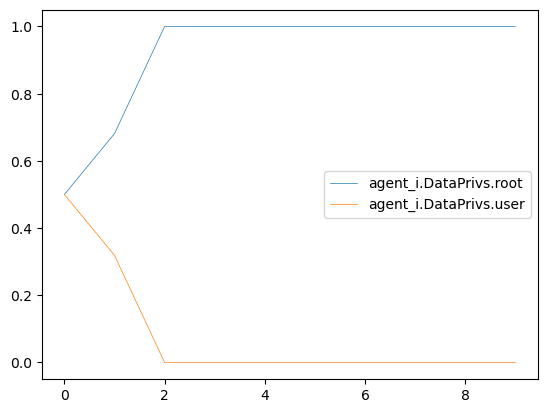

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0       LogActivity   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

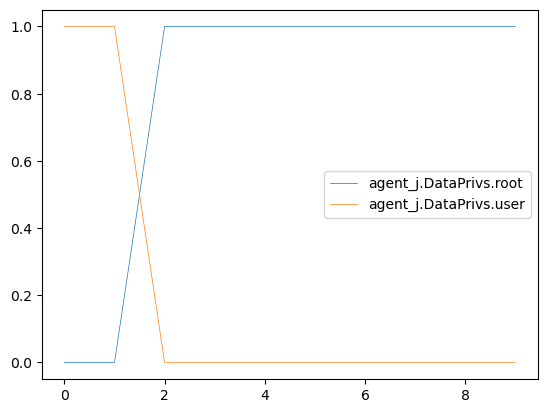

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0           Exit   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

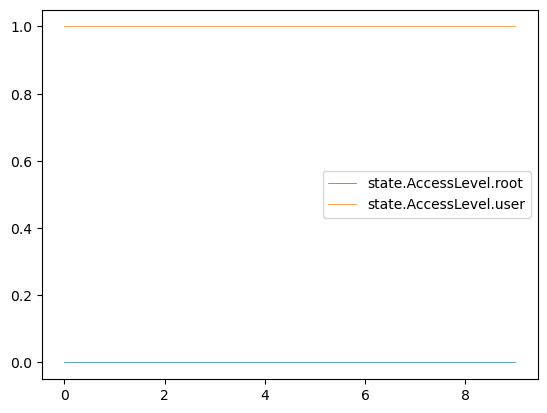

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

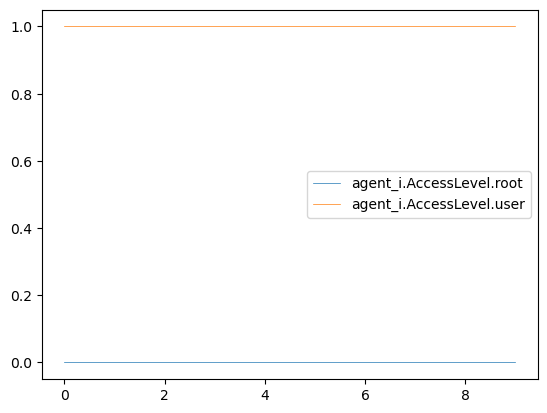

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.036132                  0.963868               Nop   
4                  0.669235                  0.330765       LogActivity   
5                  0.232575                  0.767425               Nop   
6                  0.050960                  0.949040               Nop   
7                  0.047645                  0.952355               Nop   
8                  0.047599                  0.952401               Nop   
9                  0.047599                  0.952401               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

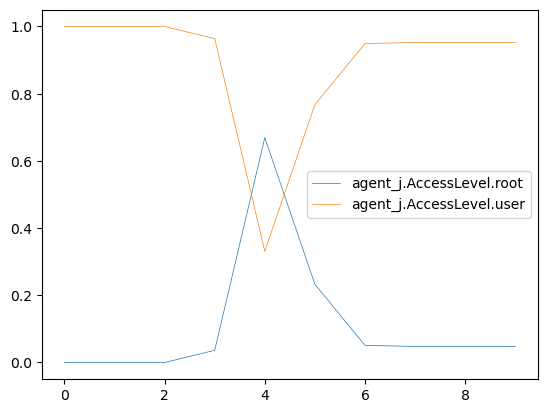

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action    agent_j.action
0                1.0                 0.0      FileRecon      DecoyAccount
1                1.0                 0.0           Exit  RestrictAccPrivs
2                1.0                 0.0            Nop               Nop
3                1.0                 0.0            Nop               Nop
4                1.0                 0.0            Nop       LogActivity
5                1.0                 0.0            Nop               Nop
6                1.0                 0.0            Nop               Nop
7                1.0                 0.0            Nop               Nop
8                1.0                 0.0            Nop               Nop
9                1.0                 0.0            Nop               Nop

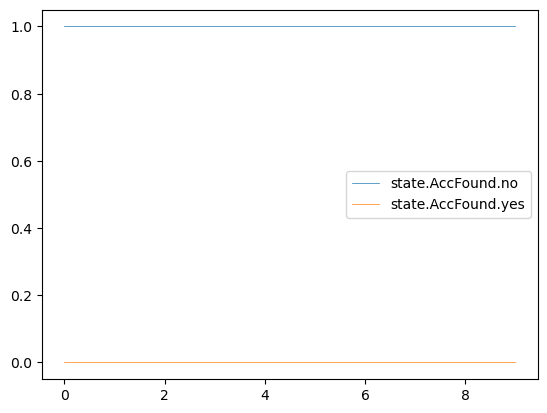

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action    agent_j.action  \
0                  1.0                   0.0      FileRecon      DecoyAccount   
1                  1.0                   0.0           Exit  RestrictAccPrivs   
2                  1.0                   0.0            Nop               Nop   
3                  1.0                   0.0            Nop               Nop   
4                  1.0                   0.0            Nop       LogActivity   
5                  1.0                   0.0            Nop               Nop   
6                  1.0                   0.0            Nop               Nop   
7                  1.0                   0.0            Nop               Nop   
8                  1.0                   0.0            Nop               Nop   
9                  1.0                   0.0            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                            auth                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

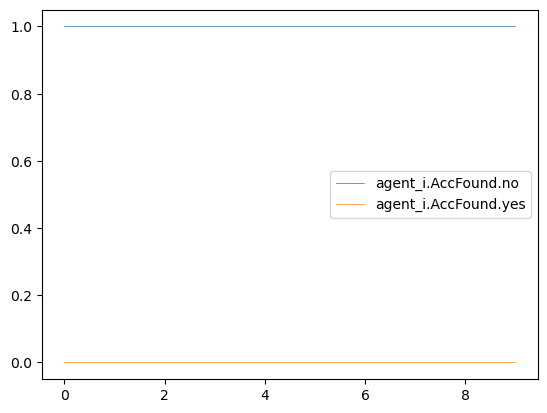

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action agent_i.action  \
0             1.000000              0.000000      DecoyAccount      FileRecon   
1             1.000000              0.000000  RestrictAccPrivs           Exit   
2             0.959851              0.040149               Nop            Nop   
3             0.200036              0.799964               Nop            Nop   
4             0.234802              0.765198       LogActivity            Nop   
5             0.534081              0.465919               Nop            Nop   
6             0.660473              0.339527               Nop            Nop   
7             0.662780              0.337220               Nop            Nop   
8             0.662812              0.337188               Nop            Nop   
9             0.662812              0.337188               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

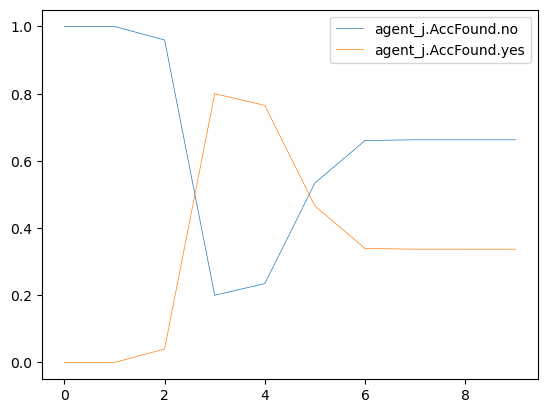

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action    agent_j.action
0                 1.0                  0.0      FileRecon      DecoyAccount
1                 1.0                  0.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop               Nop
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop       LogActivity
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

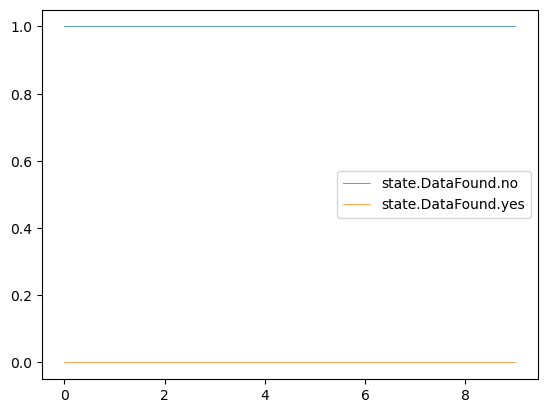

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  \
0              1.000000               0.000000      FileRecon   
1              0.992126               0.007874           Exit   
2              0.992126               0.007874            Nop   
3              0.992126               0.007874            Nop   
4              0.992126               0.007874            Nop   
5              0.992126               0.007874            Nop   
6              0.992126               0.007874            Nop   
7              0.992126               0.007874            Nop   
8              0.992126               0.007874            Nop   
9              0.992126               0.007874            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

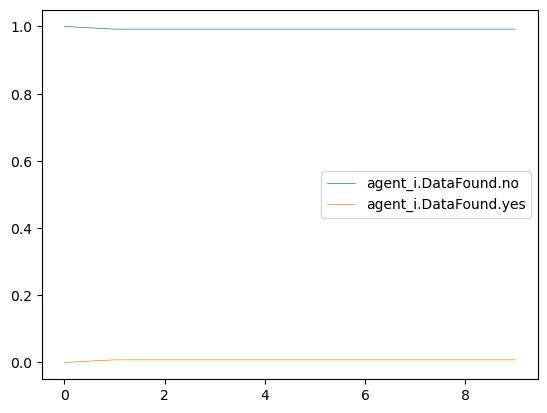

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.048327               0.951673               Nop   
3              0.048364               0.951636               Nop   
4              0.074951               0.925049       LogActivity   
5              0.149758               0.850242               Nop   
6              0.184278               0.815722               Nop   
7              0.184911               0.815089               Nop   
8              0.184920               0.815080               Nop   
9              0.184920               0.815080               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

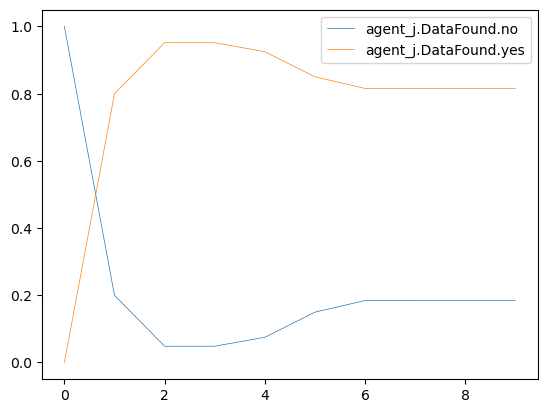

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action    agent_j.action  
0                      1.0      FileRecon      DecoyAccount  
1                      1.0           Exit  RestrictAccPrivs  
2                      1.0            Nop               Nop  
3                      1.0            Nop               Nop  
4                      1.0            Nop       LogActivity  
5                      1.0            Nop               Nop  
6                      1.0            Nop               Nop  
7                      1.0            Nop               Nop  
8                      1.0            Nop               Nop  
9                      1.0            Nop               Nop

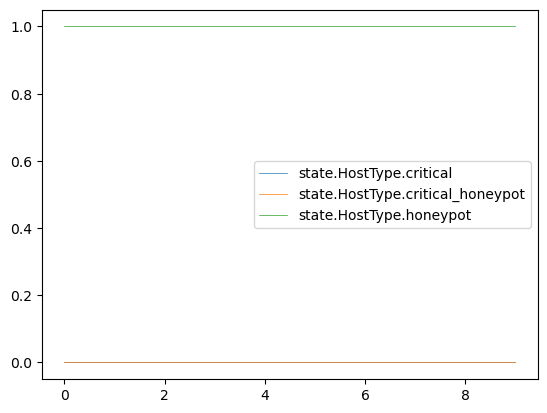

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action    agent_j.action  \
0                        0.0      FileRecon      DecoyAccount   
1                        0.0           Exit  RestrictAccPrivs   
2                        0.0            Nop               Nop   
3                        0.0            Nop               Nop   
4                        0.0            Nop       LogActivity   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                            auth                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

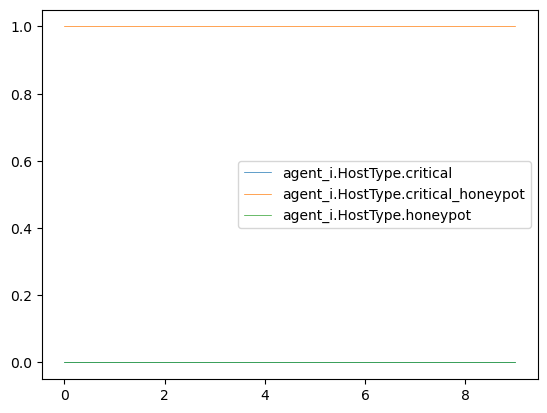

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action agent_i.action  \
0                        1.0      DecoyAccount      FileRecon   
1                        1.0  RestrictAccPrivs           Exit   
2                        1.0               Nop            Nop   
3                        1.0               Nop            Nop   
4                        1.0       LogActivity            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

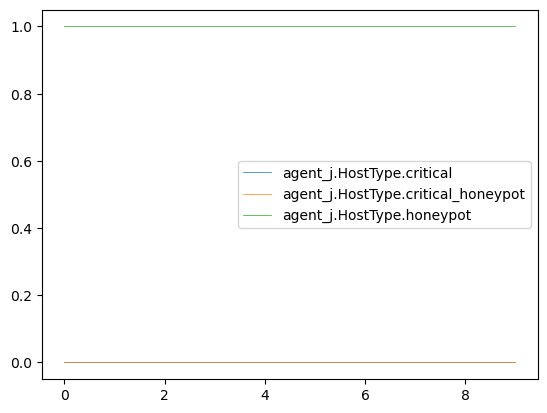

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                    5.000000e-01   
1                         0.980392                    1.960785e-02   
2                         0.999999                    6.864807e-07   
3                         0.999999                    6.864807e-07   
4                         0.999999                    6.864807e-07   
5                         0.999999                    6.864807e-07   
6                         0.999999                    6.864807e-07   
7                         0.999999                    6.864807e-07   
8                         0.999999                    6.864807e-07   
9                         0.999999                    6.864807e-07   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                         none   
5                          denied                         none   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           success                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

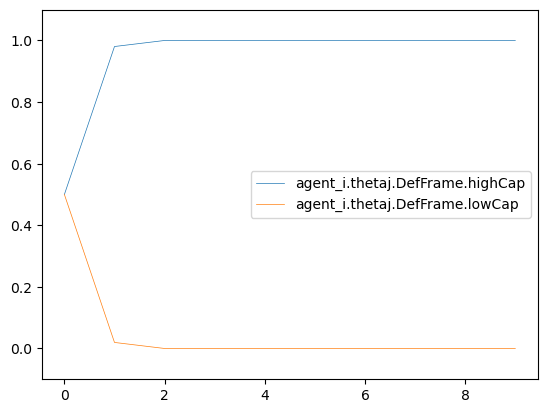

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

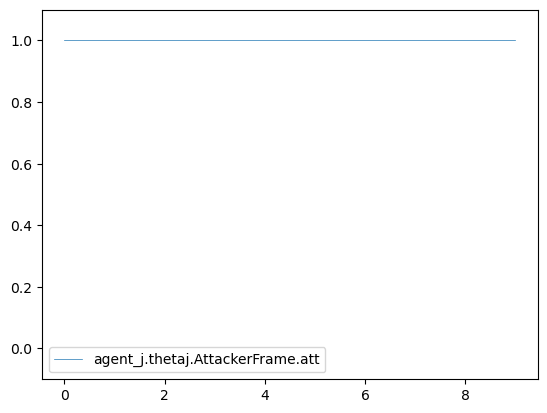

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0       FileRecon      DecoyAccount
1                 0.0                  1.0  ManipulateData  RestrictAccPrivs
2                 0.0                  1.0            Exit               Nop
3                 1.0                  0.0             Nop               Nop
4                 1.0                  0.0             Nop       LogActivity
5                 1.0                  0.0             Nop               Nop
6                 1.0                  0.0             Nop       LogActivity
7                 1.0                  0.0             Nop               Nop
8                 1.0                  0.0             Nop               Nop
9                 1.0                  0.0             Nop               Nop

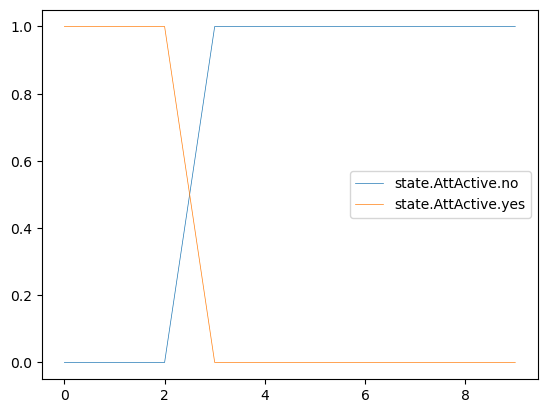

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   1.0                    0.0             Nop   
4                   1.0                    0.0             Nop   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6       LogActivity                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

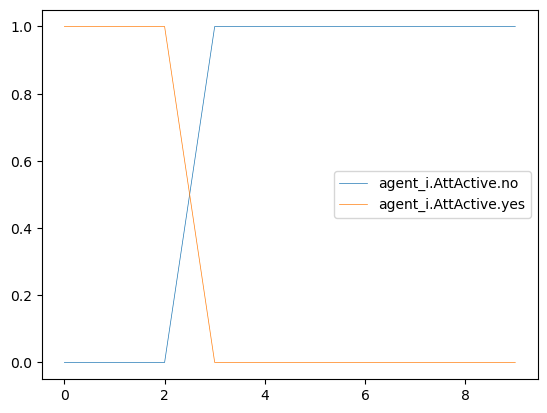

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0          0.000000e+00               1.000000      DecoyAccount   
1          0.000000e+00               1.000000  RestrictAccPrivs   
2          0.000000e+00               1.000000               Nop   
3          8.618953e-07               0.999999               Nop   
4          8.029167e-02               0.919708       LogActivity   
5          7.724006e-01               0.227599               Nop   
6          3.668503e-01               0.633150       LogActivity   
7          9.984401e-01               0.001560               Nop   
8          9.999687e-01               0.000031               Nop   
9          1.000000e+00               0.000000               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

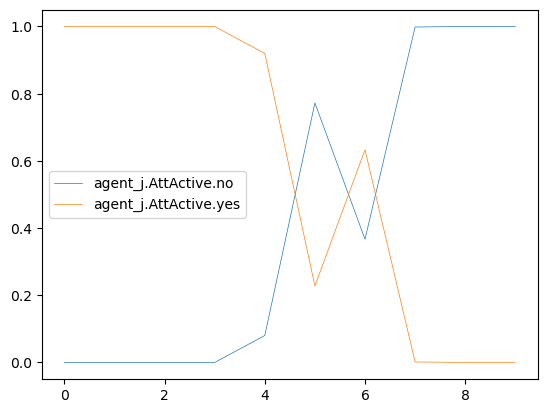

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   1.0                    0.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6       LogActivity  
7               Nop  
8               Nop  
9               Nop

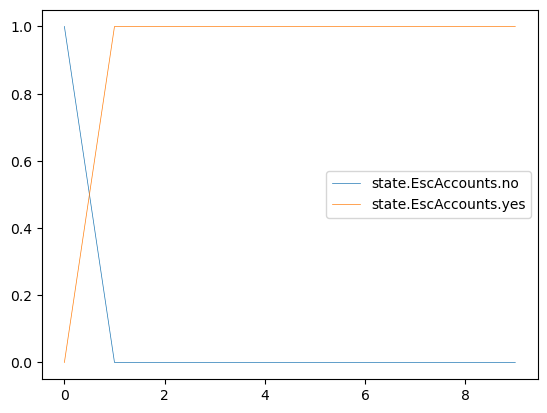

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0            5.000000e-01                 0.500000       FileRecon   
1            1.470588e-02                 0.985294  ManipulateData   
2            5.148605e-07                 1.000000            Exit   
3            5.148605e-07                 1.000000             Nop   
4            5.148606e-07                 1.000000             Nop   
5            5.148606e-07                 1.000000             Nop   
6            5.148605e-07                 0.999999             Nop   
7            5.148605e-07                 1.000000             Nop   
8            5.148605e-07                 0.999999             Nop   
9            5.148605e-07                 0.999999             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6       LogActivity                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

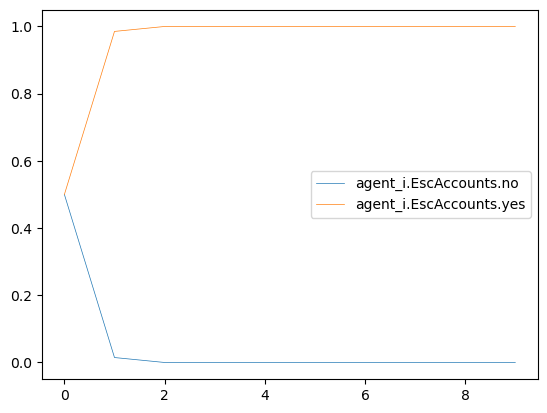

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0       LogActivity   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0       LogActivity   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

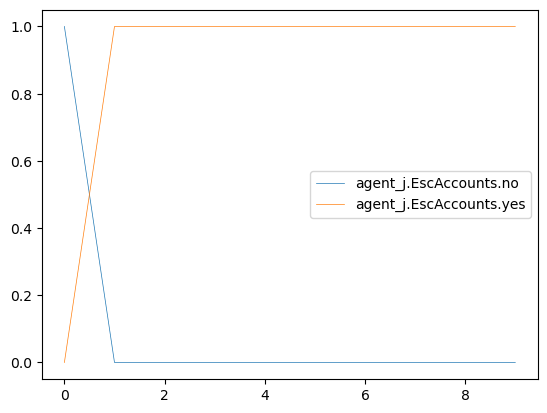

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0  ManipulateData   
2                    0.0                     1.0            Exit   
3                    0.0                     1.0             Nop   
4                    0.0                     1.0             Nop   
5                    0.0                     1.0             Nop   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6       LogActivity  
7               Nop  
8               Nop  
9               Nop

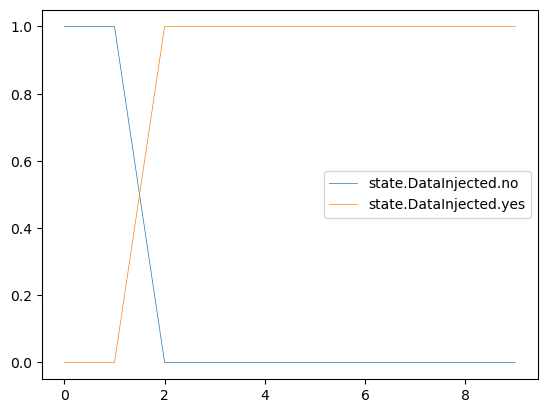

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.000112                  0.999888            Exit   
3                 0.000112                  0.999888             Nop   
4                 0.000112                  0.999888             Nop   
5                 0.000112                  0.999888             Nop   
6                 0.000112                  0.999888             Nop   
7                 0.000112                  0.999888             Nop   
8                 0.000112                  0.999888             Nop   
9                 0.000112                  0.999888             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6       LogActivity                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

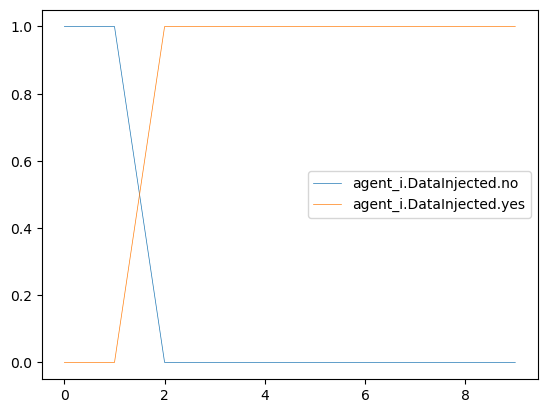

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.280000                  0.720000               Nop   
3                 0.131210                  0.868790               Nop   
4                 0.146473                  0.853527       LogActivity   
5                 0.252982                  0.747018               Nop   
6                 0.116163                  0.883837       LogActivity   
7                 0.116743                  0.883257               Nop   
8                 0.116752                  0.883248               Nop   
9                 0.116752                  0.883248               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

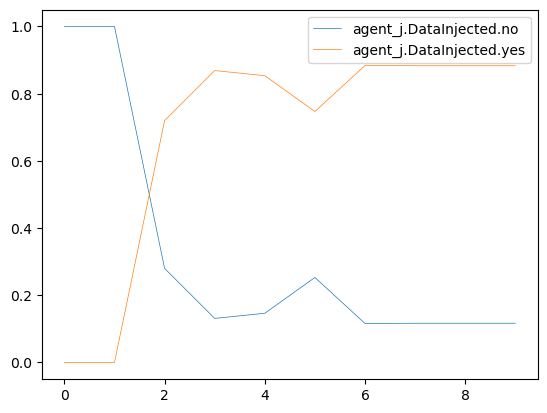

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6       LogActivity  
7               Nop  
8               Nop  
9               Nop

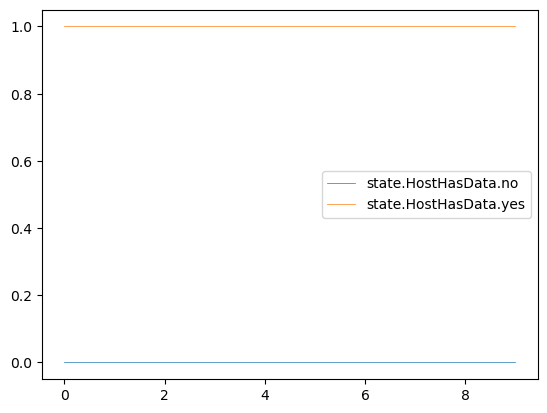

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.128676                 0.871324  ManipulateData   
2                0.000070                 0.999930            Exit   
3                0.000070                 0.999930             Nop   
4                0.000070                 0.999930             Nop   
5                0.000070                 0.999930             Nop   
6                0.000070                 0.999930             Nop   
7                0.000070                 0.999930             Nop   
8                0.000070                 0.999930             Nop   
9                0.000070                 0.999930             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6       LogActivity                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

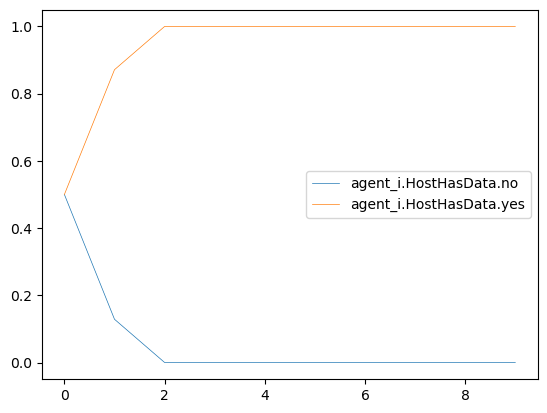

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0       LogActivity   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0       LogActivity   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

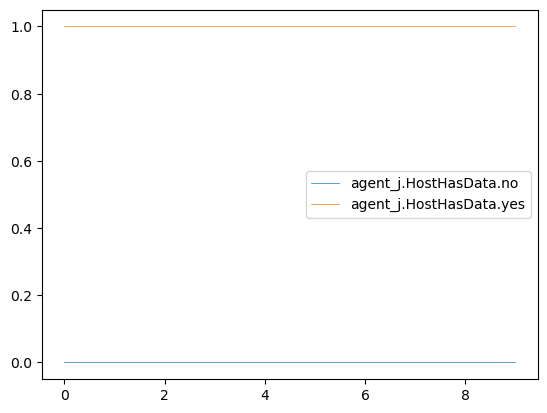

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0       FileRecon   
1                   0.0                   1.0  ManipulateData   
2                   1.0                   0.0            Exit   
3                   1.0                   0.0             Nop   
4                   1.0                   0.0             Nop   
5                   1.0                   0.0             Nop   
6                   1.0                   0.0             Nop   
7                   1.0                   0.0             Nop   
8                   1.0                   0.0             Nop   
9                   1.0                   0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6       LogActivity  
7               Nop  
8               Nop  
9               Nop

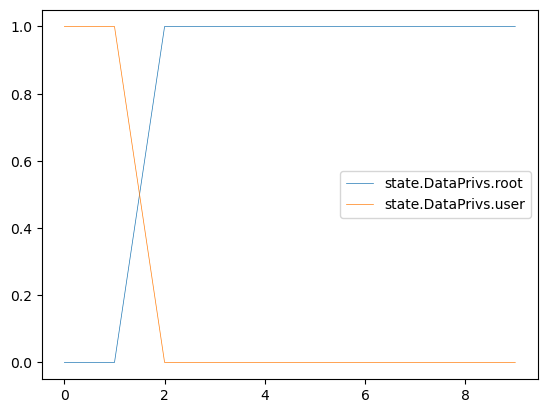

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.139706                0.860294  ManipulateData   
2                1.000000                0.000000            Exit   
3                1.000000                0.000000             Nop   
4                1.000000                0.000000             Nop   
5                1.000000                0.000000             Nop   
6                1.000000                0.000000             Nop   
7                1.000000                0.000000             Nop   
8                1.000000                0.000000             Nop   
9                1.000000                0.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6       LogActivity                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

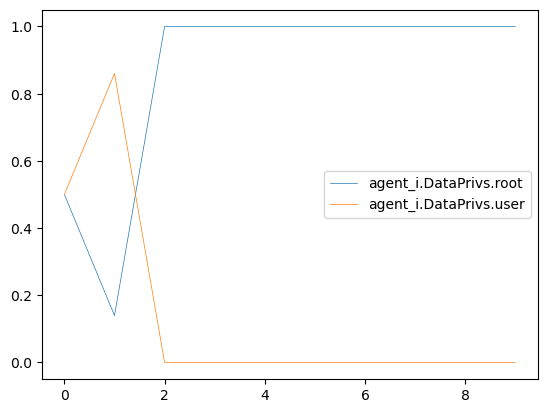

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0       LogActivity   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0       LogActivity   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

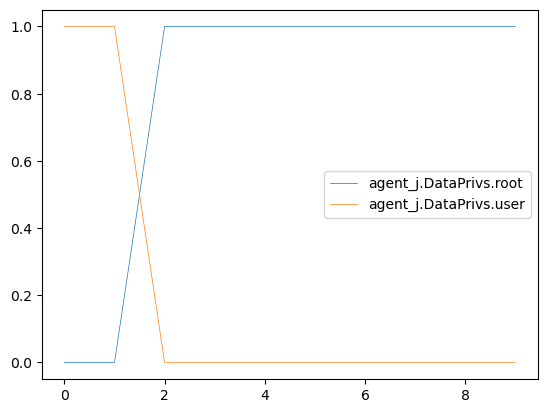

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0  ManipulateData   
2                     0.0                     1.0            Exit   
3                     0.0                     1.0             Nop   
4                     0.0                     1.0             Nop   
5                     0.0                     1.0             Nop   
6                     0.0                     1.0             Nop   
7                     0.0                     1.0             Nop   
8                     0.0                     1.0             Nop   
9                     0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6       LogActivity  
7               Nop  
8               Nop  
9               Nop

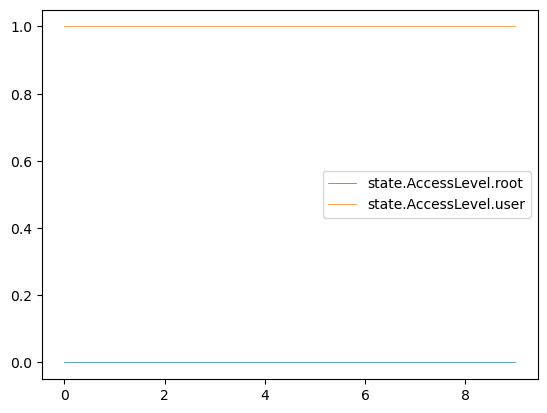

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0            Exit   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6       LogActivity                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

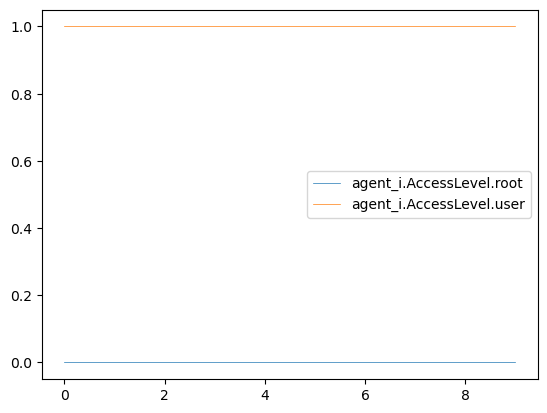

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.033510                  0.966490               Nop   
4                  0.655992                  0.344008       LogActivity   
5                  0.221688                  0.778312               Nop   
6                  0.637274                  0.362726       LogActivity   
7                  0.633879                  0.366122               Nop   
8                  0.633810                  0.366190               Nop   
9                  0.633810                  0.366190               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

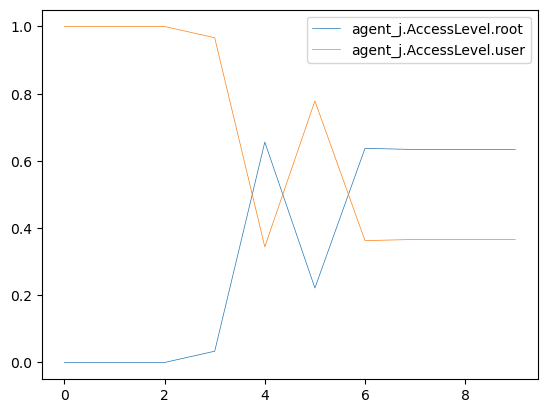

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0       FileRecon      DecoyAccount
1                1.0                 0.0  ManipulateData  RestrictAccPrivs
2                1.0                 0.0            Exit               Nop
3                1.0                 0.0             Nop               Nop
4                1.0                 0.0             Nop       LogActivity
5                1.0                 0.0             Nop               Nop
6                1.0                 0.0             Nop       LogActivity
7                1.0                 0.0             Nop               Nop
8                1.0                 0.0             Nop               Nop
9                1.0                 0.0             Nop               Nop

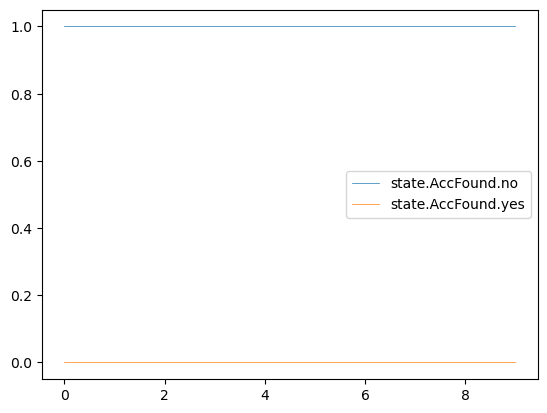

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0                  1.0                   0.0       FileRecon   
1                  1.0                   0.0  ManipulateData   
2                  1.0                   0.0            Exit   
3                  1.0                   0.0             Nop   
4                  1.0                   0.0             Nop   
5                  1.0                   0.0             Nop   
6                  1.0                   0.0             Nop   
7                  1.0                   0.0             Nop   
8                  1.0                   0.0             Nop   
9                  1.0                   0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6       LogActivity                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

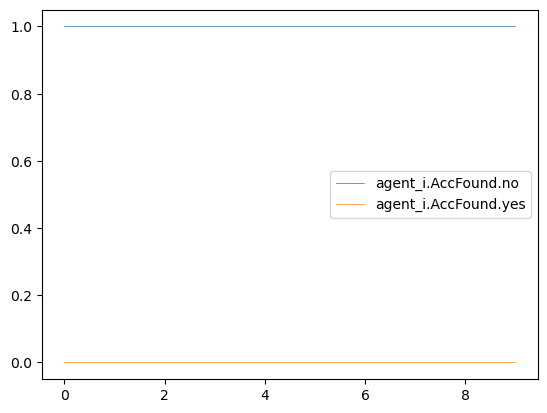

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.784000              0.216000               Nop   
3             0.235745              0.764255               Nop   
4             0.243766              0.756234       LogActivity   
5             0.541278              0.458722               Nop   
6             0.252262              0.747738       LogActivity   
7             0.254623              0.745377               Nop   
8             0.254671              0.745329               Nop   
9             0.254671              0.745329               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

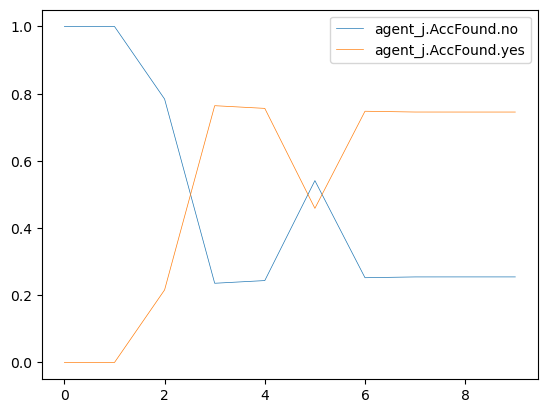

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0       FileRecon      DecoyAccount
1                 0.0                  1.0  ManipulateData  RestrictAccPrivs
2                 0.0                  1.0            Exit               Nop
3                 0.0                  1.0             Nop               Nop
4                 0.0                  1.0             Nop       LogActivity
5                 0.0                  1.0             Nop               Nop
6                 0.0                  1.0             Nop       LogActivity
7                 0.0                  1.0             Nop               Nop
8                 0.0                  1.0             Nop               Nop
9                 0.0                  1.0             Nop               Nop

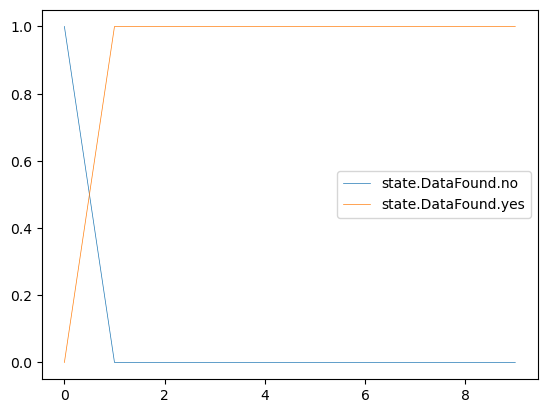

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000       FileRecon   
1              0.205882               0.794118  ManipulateData   
2              0.000112               0.999888            Exit   
3              0.000112               0.999888             Nop   
4              0.000112               0.999888             Nop   
5              0.000112               0.999888             Nop   
6              0.000112               0.999888             Nop   
7              0.000112               0.999888             Nop   
8              0.000112               0.999888             Nop   
9              0.000112               0.999888             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4       LogActivity                            auth   
5               Nop                          denied   
6       LogActivity                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

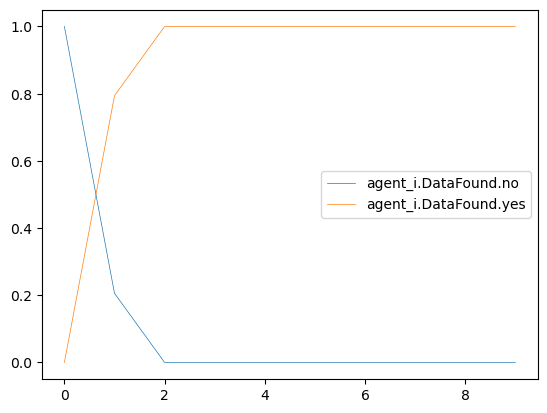

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.200000               0.800000               Nop   
3              0.095907               0.904093               Nop   
4              0.093256               0.906744       LogActivity   
5              0.189559               0.810441               Nop   
6              0.088216               0.911784       LogActivity   
7              0.088936               0.911064               Nop   
8              0.088953               0.911047               Nop   
9              0.088953               0.911047               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

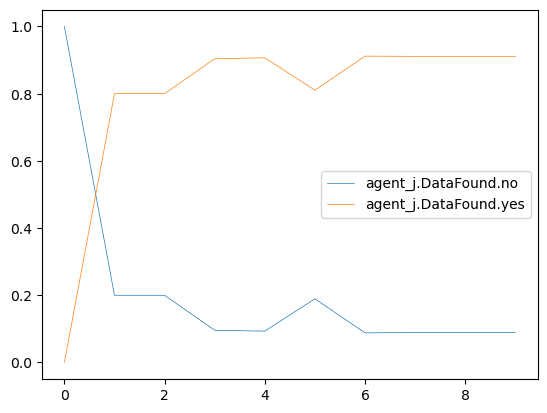

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0       FileRecon      DecoyAccount  
1                      1.0  ManipulateData  RestrictAccPrivs  
2                      1.0            Exit               Nop  
3                      1.0             Nop               Nop  
4                      1.0             Nop       LogActivity  
5                      1.0             Nop               Nop  
6                      1.0             Nop       LogActivity  
7                      1.0             Nop               Nop  
8                      1.0             Nop               Nop  
9                      1.0             Nop               Nop

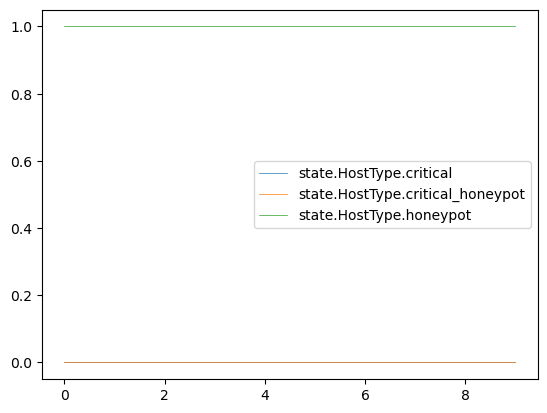

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0       FileRecon      DecoyAccount   
1                        0.0  ManipulateData  RestrictAccPrivs   
2                        0.0            Exit               Nop   
3                        0.0             Nop               Nop   
4                        0.0             Nop       LogActivity   
5                        0.0             Nop               Nop   
6                        0.0             Nop       LogActivity   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                         none   
5                          denied                         none   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           success                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

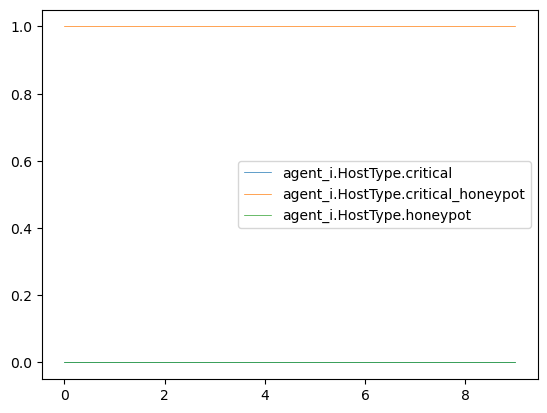

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount       FileRecon   
1                        1.0  RestrictAccPrivs  ManipulateData   
2                        1.0               Nop            Exit   
3                        1.0               Nop             Nop   
4                        1.0       LogActivity             Nop   
5                        1.0               Nop             Nop   
6                        1.0       LogActivity             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                       file_write

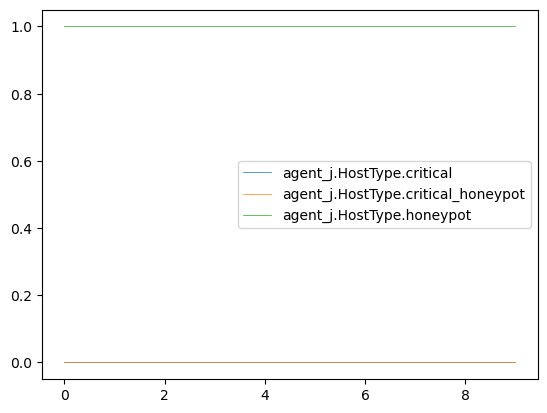

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                    5.000000e-01   
1                         0.980392                    1.960785e-02   
2                         0.999999                    6.864807e-07   
3                         0.999999                    6.864807e-07   
4                         0.999999                    6.864807e-07   
5                         0.999999                    6.864807e-07   
6                         0.999999                    6.864807e-07   
7                         0.999999                    6.864807e-07   
8                         0.999999                    6.864807e-07   
9                         0.999999                    6.864807e-07   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                         none   
3                            auth                   user_files   
4                            auth                   user_files   
5                          denied                   user_files   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

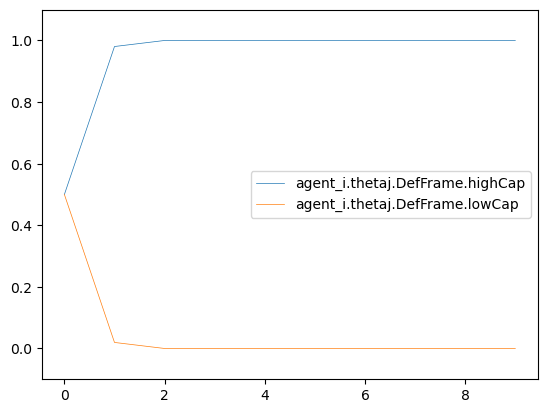

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                       file_write
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                   login_activity
6                               1.0                   login_activity
7                               1.0                       file_write
8                               1.0                        file_enum
9                               1.0                             none

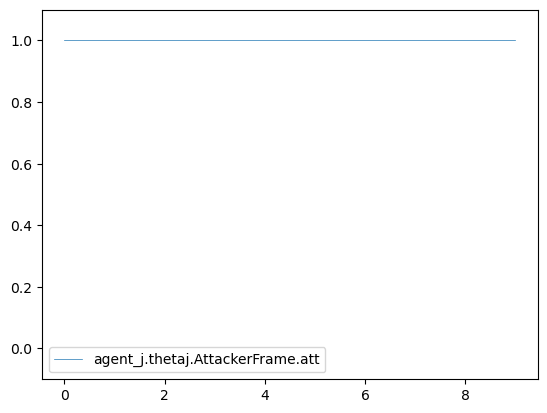

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0       FileRecon      DecoyAccount
1                 0.0                  1.0  ManipulateData  RestrictAccPrivs
2                 0.0                  1.0            Exit               Nop
3                 1.0                  0.0             Nop               Nop
4                 1.0                  0.0             Nop       LogActivity
5                 1.0                  0.0             Nop               Nop
6                 1.0                  0.0             Nop               Nop
7                 1.0                  0.0             Nop               Nop
8                 1.0                  0.0             Nop               Nop
9                 1.0                  0.0             Nop               Nop

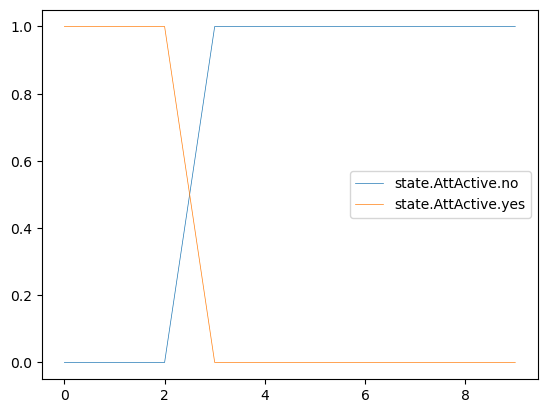

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   1.0                    0.0             Nop   
4                   1.0                    0.0             Nop   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

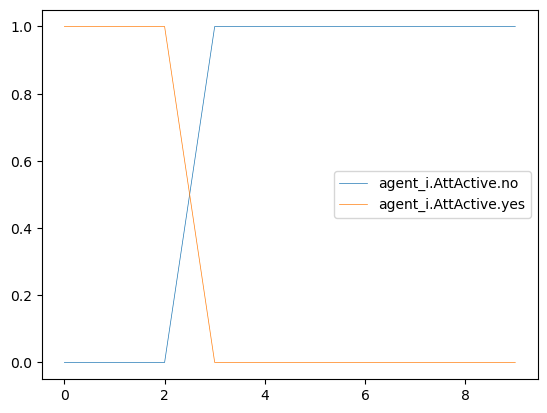

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000               Nop   
3              0.000046               0.999954               Nop   
4              0.082208               0.917792       LogActivity   
5              0.761223               0.238777               Nop   
6              0.776734               0.223266               Nop   
7              0.977016               0.022984               Nop   
8              0.984660               0.015340               Nop   
9              1.000000               0.000000               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                   login_activity  
6             Nop                   login_activity  
7             Nop                       file_write  
8             Nop                        file_enum  
9             Nop                             none

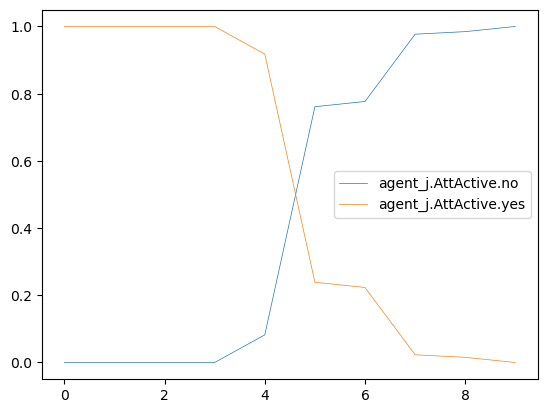

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   1.0                    0.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

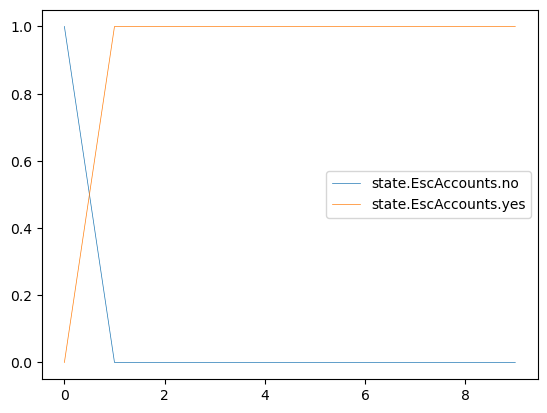

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0            5.000000e-01                 0.500000       FileRecon   
1            1.470588e-02                 0.985294  ManipulateData   
2            5.148605e-07                 1.000000            Exit   
3            5.148605e-07                 1.000000             Nop   
4            5.148606e-07                 1.000000             Nop   
5            5.148606e-07                 1.000000             Nop   
6            5.148605e-07                 0.999999             Nop   
7            5.148605e-07                 1.000000             Nop   
8            5.148605e-07                 0.999999             Nop   
9            5.148605e-07                 0.999999             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

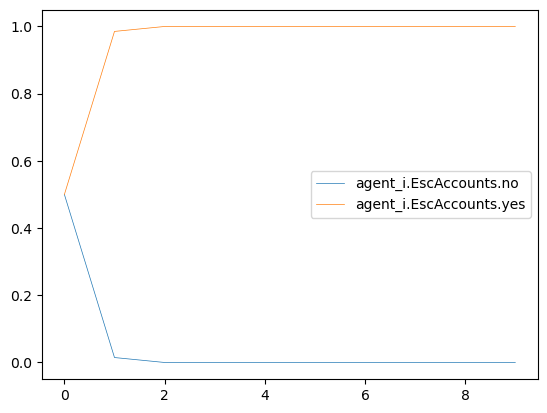

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0       LogActivity   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                   login_activity  
6             Nop                   login_activity  
7             Nop                       file_write  
8             Nop                        file_enum  
9             Nop                             none

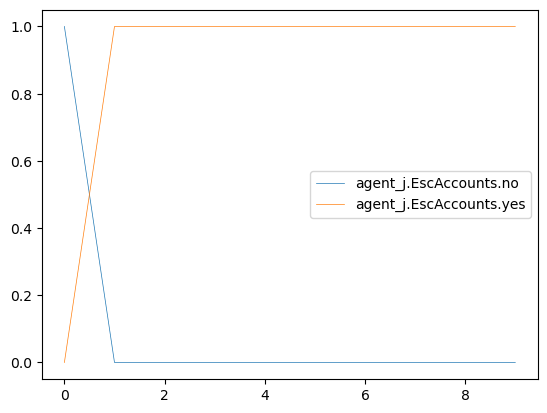

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0  ManipulateData   
2                    0.0                     1.0            Exit   
3                    0.0                     1.0             Nop   
4                    0.0                     1.0             Nop   
5                    0.0                     1.0             Nop   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

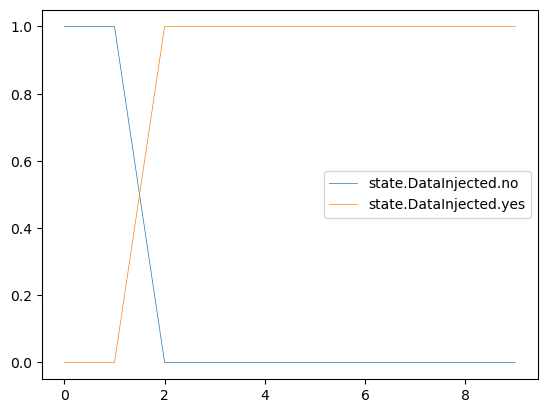

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.000112                  0.999888            Exit   
3                 0.000112                  0.999888             Nop   
4                 0.000112                  0.999888             Nop   
5                 0.000112                  0.999888             Nop   
6                 0.000112                  0.999888             Nop   
7                 0.000112                  0.999888             Nop   
8                 0.000112                  0.999888             Nop   
9                 0.000112                  0.999888             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

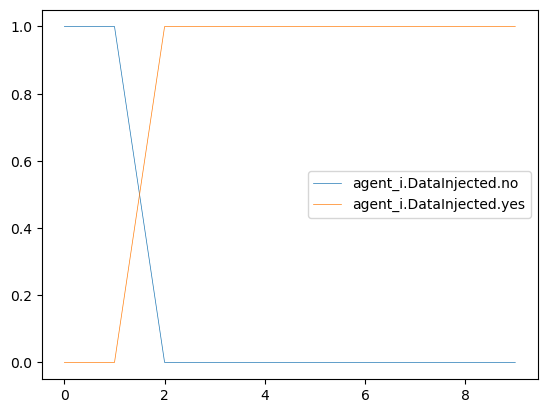

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.063197                  0.936803               Nop   
3                 0.063234                  0.936766               Nop   
4                 0.129242                  0.870758       LogActivity   
5                 0.216296                  0.783705               Nop   
6                 0.212092                  0.787908               Nop   
7                 0.211210                  0.788790               Nop   
8                 0.208356                  0.791644               Nop   
9                 0.208356                  0.791644               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                   login_activity  
6             Nop                   login_activity  
7             Nop                       file_write  
8             Nop                        file_enum  
9             Nop                             none

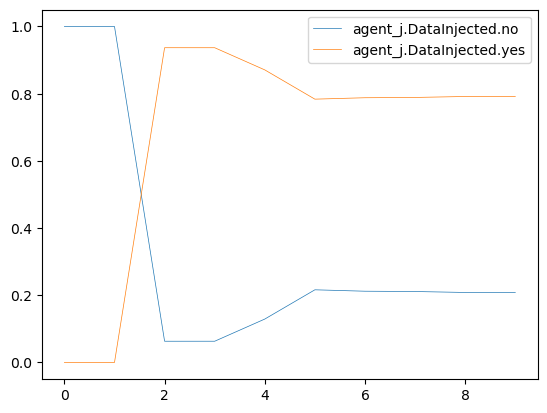

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0            Exit   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

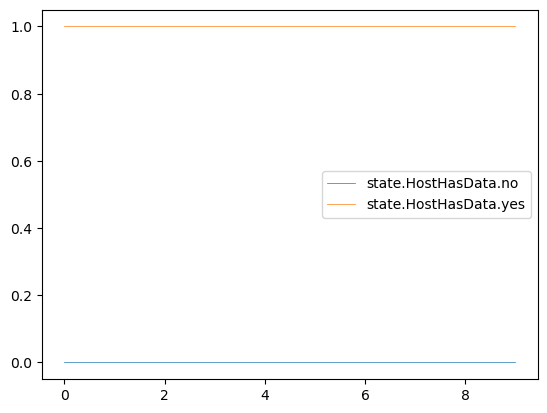

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.128676                 0.871324  ManipulateData   
2                0.000070                 0.999930            Exit   
3                0.000070                 0.999930             Nop   
4                0.000070                 0.999930             Nop   
5                0.000070                 0.999930             Nop   
6                0.000070                 0.999930             Nop   
7                0.000070                 0.999930             Nop   
8                0.000070                 0.999930             Nop   
9                0.000070                 0.999930             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

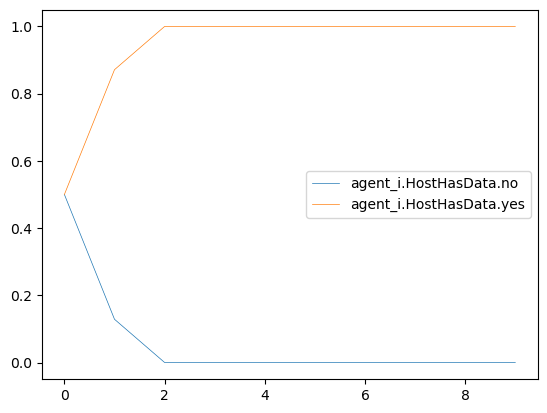

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0       LogActivity   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                   login_activity  
6             Nop                   login_activity  
7             Nop                       file_write  
8             Nop                        file_enum  
9             Nop                             none

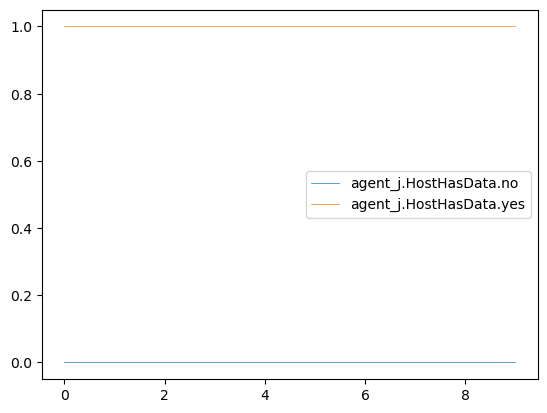

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0       FileRecon   
1                   0.0                   1.0  ManipulateData   
2                   1.0                   0.0            Exit   
3                   1.0                   0.0             Nop   
4                   1.0                   0.0             Nop   
5                   1.0                   0.0             Nop   
6                   1.0                   0.0             Nop   
7                   1.0                   0.0             Nop   
8                   1.0                   0.0             Nop   
9                   1.0                   0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

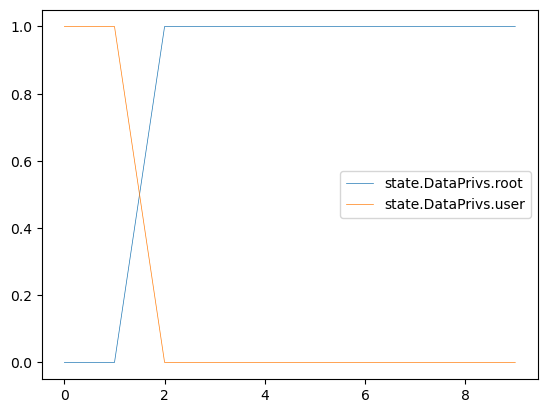

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.139706                0.860294  ManipulateData   
2                1.000000                0.000000            Exit   
3                1.000000                0.000000             Nop   
4                1.000000                0.000000             Nop   
5                1.000000                0.000000             Nop   
6                1.000000                0.000000             Nop   
7                1.000000                0.000000             Nop   
8                1.000000                0.000000             Nop   
9                1.000000                0.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

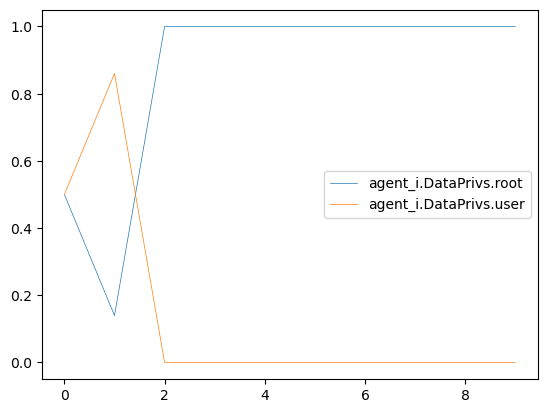

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0       LogActivity   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                   login_activity  
6             Nop                   login_activity  
7             Nop                       file_write  
8             Nop                        file_enum  
9             Nop                             none

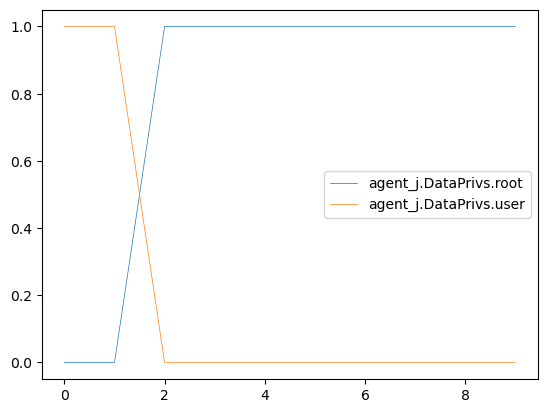

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0  ManipulateData   
2                     0.0                     1.0            Exit   
3                     0.0                     1.0             Nop   
4                     0.0                     1.0             Nop   
5                     0.0                     1.0             Nop   
6                     0.0                     1.0             Nop   
7                     0.0                     1.0             Nop   
8                     0.0                     1.0             Nop   
9                     0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4       LogActivity  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

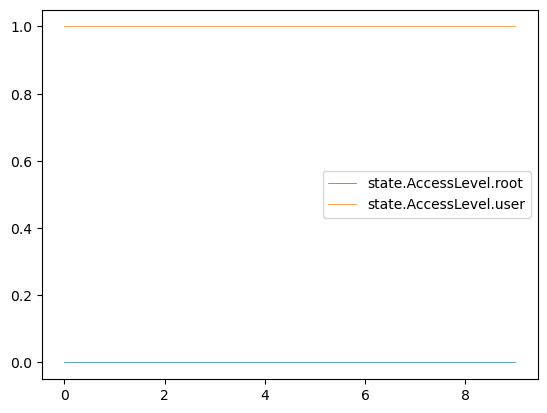

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0            Exit   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

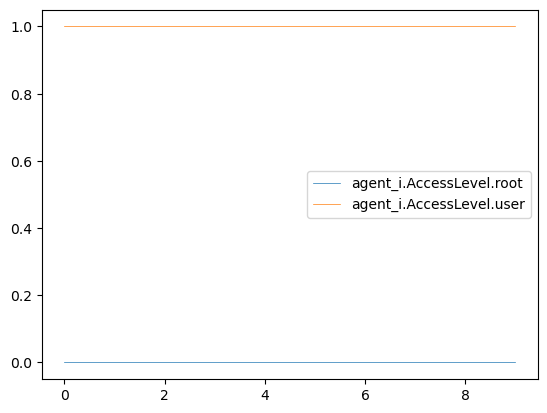

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.036132                  0.963868               Nop   
4                  0.669235                  0.330765       LogActivity   
5                  0.232575                  0.767425               Nop   
6                  0.232575                  0.767425               Nop   
7                  0.232575                  0.767425               Nop   
8                  0.242666                  0.757335               Nop   
9                  0.242666                  0.757335               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                   login_activity  
6             Nop                   login_activity  
7             Nop                       file_write  
8             Nop                        file_enum  
9             Nop                             none

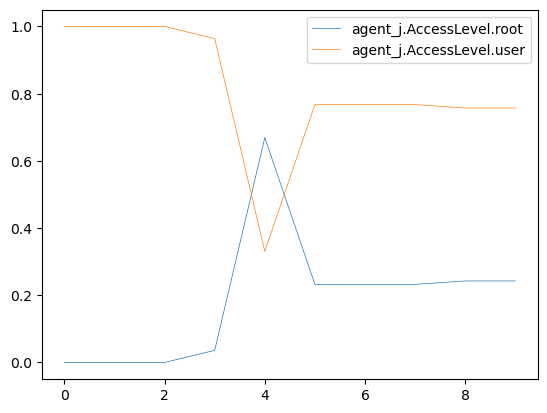

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0       FileRecon      DecoyAccount
1                1.0                 0.0  ManipulateData  RestrictAccPrivs
2                1.0                 0.0            Exit               Nop
3                1.0                 0.0             Nop               Nop
4                1.0                 0.0             Nop       LogActivity
5                1.0                 0.0             Nop               Nop
6                1.0                 0.0             Nop               Nop
7                1.0                 0.0             Nop               Nop
8                1.0                 0.0             Nop               Nop
9                1.0                 0.0             Nop               Nop

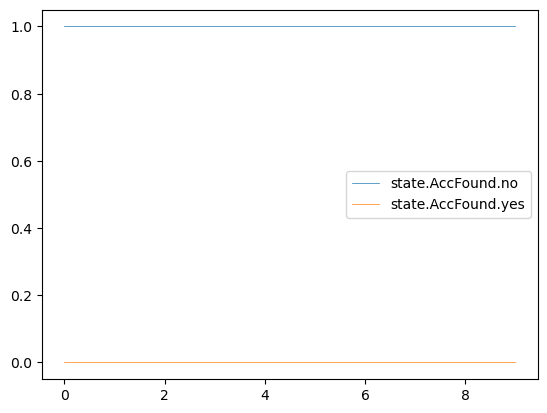

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0                  1.0                   0.0       FileRecon   
1                  1.0                   0.0  ManipulateData   
2                  1.0                   0.0            Exit   
3                  1.0                   0.0             Nop   
4                  1.0                   0.0             Nop   
5                  1.0                   0.0             Nop   
6                  1.0                   0.0             Nop   
7                  1.0                   0.0             Nop   
8                  1.0                   0.0             Nop   
9                  1.0                   0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

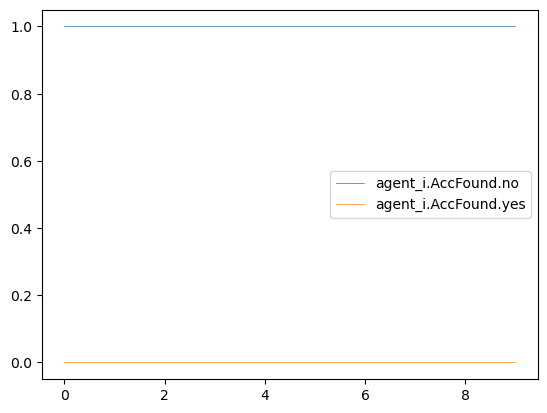

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.959851              0.040149               Nop   
3             0.200036              0.799964               Nop   
4             0.234802              0.765198       LogActivity   
5             0.534081              0.465919               Nop   
6             0.534081              0.465919               Nop   
7             0.534081              0.465919               Nop   
8             0.527059              0.472941               Nop   
9             0.527059              0.472941               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                   login_activity  
6             Nop                   login_activity  
7             Nop                       file_write  
8             Nop                        file_enum  
9             Nop                             none

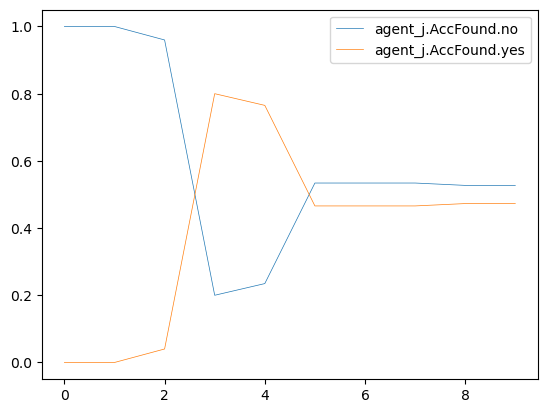

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0       FileRecon      DecoyAccount
1                 0.0                  1.0  ManipulateData  RestrictAccPrivs
2                 0.0                  1.0            Exit               Nop
3                 0.0                  1.0             Nop               Nop
4                 0.0                  1.0             Nop       LogActivity
5                 0.0                  1.0             Nop               Nop
6                 0.0                  1.0             Nop               Nop
7                 0.0                  1.0             Nop               Nop
8                 0.0                  1.0             Nop               Nop
9                 0.0                  1.0             Nop               Nop

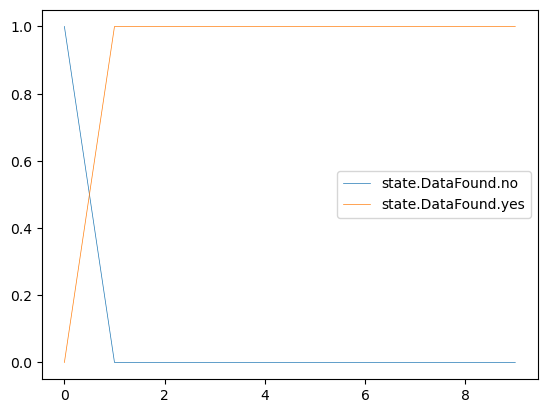

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000       FileRecon   
1              0.205882               0.794118  ManipulateData   
2              0.000112               0.999888            Exit   
3              0.000112               0.999888             Nop   
4              0.000112               0.999888             Nop   
5              0.000112               0.999888             Nop   
6              0.000112               0.999888             Nop   
7              0.000112               0.999888             Nop   
8              0.000112               0.999888             Nop   
9              0.000112               0.999888             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4       LogActivity                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

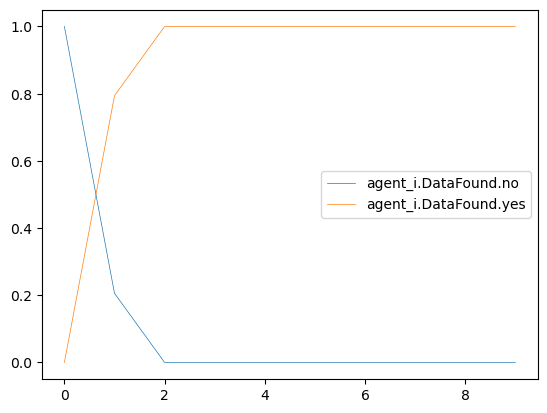

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.048327               0.951673               Nop   
3              0.048364               0.951636               Nop   
4              0.074951               0.925049       LogActivity   
5              0.149758               0.850242               Nop   
6              0.149179               0.850821               Nop   
7              0.149135               0.850865               Nop   
8              0.147178               0.852822               Nop   
9              0.147178               0.852822               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                   login_activity  
6             Nop                   login_activity  
7             Nop                       file_write  
8             Nop                        file_enum  
9             Nop                             none

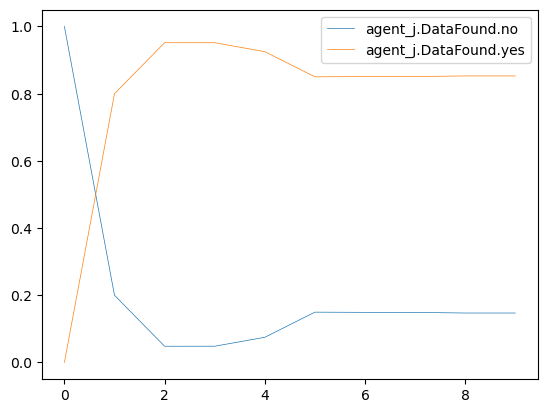

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0       FileRecon      DecoyAccount  
1                      1.0  ManipulateData  RestrictAccPrivs  
2                      1.0            Exit               Nop  
3                      1.0             Nop               Nop  
4                      1.0             Nop       LogActivity  
5                      1.0             Nop               Nop  
6                      1.0             Nop               Nop  
7                      1.0             Nop               Nop  
8                      1.0             Nop               Nop  
9                      1.0             Nop               Nop

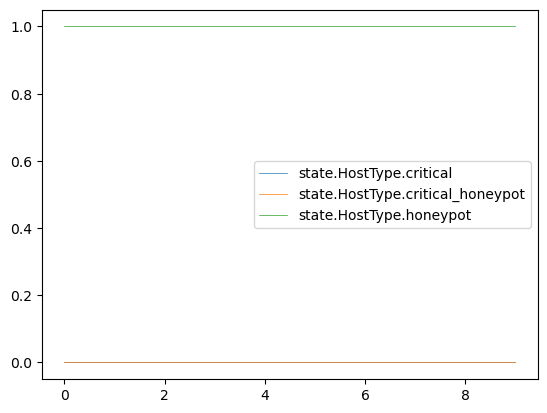

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0       FileRecon      DecoyAccount   
1                        0.0  ManipulateData  RestrictAccPrivs   
2                        0.0            Exit               Nop   
3                        0.0             Nop               Nop   
4                        0.0             Nop       LogActivity   
5                        0.0             Nop               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                         none   
3                            auth                   user_files   
4                            auth                   user_files   
5                          denied                   user_files   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

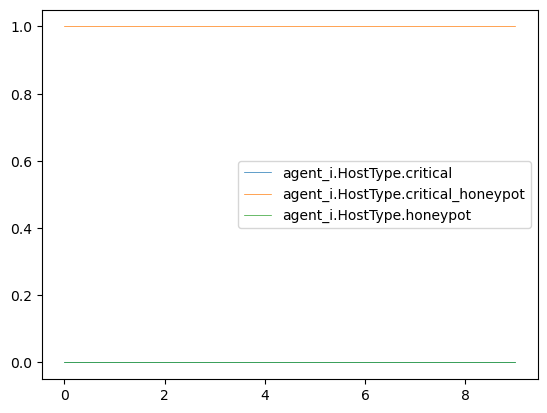

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount       FileRecon   
1                        1.0  RestrictAccPrivs  ManipulateData   
2                        1.0               Nop            Exit   
3                        1.0               Nop             Nop   
4                        1.0       LogActivity             Nop   
5                        1.0               Nop             Nop   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                       file_write  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                   login_activity  
6                   login_activity  
7                       file_write  
8                        file_enum  
9                             none

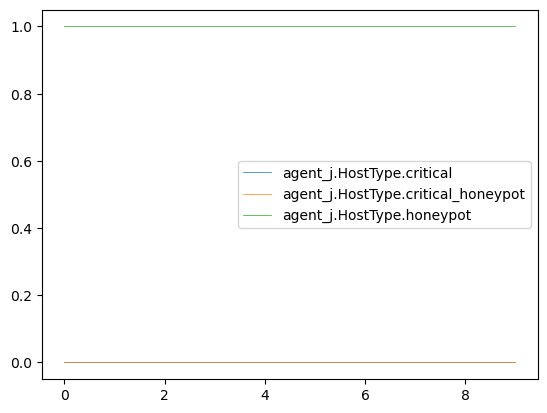

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    